In [1]:
from typing import Callable, Dict, Iterable, List, Optional, Tuple, Type, Union

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.typing as npt
import pandas as pd

%matplotlib inline

# Лабораторная работа: Сравнение алгоритма A* с алгоритмом WA* при различных значениях параметра w

В данной лабораторной работе мы проведем сравнительный анализ эффективности алгоритма A* с различными эвристиками на разнообразных типах задач поиска пути. Задачи для тестирования взяты из базы данных [Moving AI Lab](https://movingai.com/benchmarks/grids.html).

## Структура эксперимента

### Карты
Используются три карты, представляющие собой прямоугольные поля из клеток. Каждая клетка может быть либо свободной, либо занятой препятствием.

### Задачи
- Для каждой карты выбрано 100 задач различной сложности
- Задачи равномерно распределены среди сценариев, доступных для каждой карты на сайте Moving AI Lab
- Каждая задача состоит из начальной и конечной клетки
- Цель: найти кратчайший путь между начальной и конечной клетками

### Правила перемещения
- Карты считаются 8-связными
- Возможны ходы влево, вправо, вверх, вниз и по диагонали
- Ход возможен только в свободную клетку
- Запрещено "срезать углы" препятствий при диагональном перемещении

## Цель эксперимента

Провести экспериментальное исследование и анализ алгоритма WA* с разными значениями параметра w (фактор субоптимальности) на выбранных картах и задачах. Сравнить WA\* с A\*.

## Выбранные карты для тестирования

Для тестирования были выбраны следующие карты: 

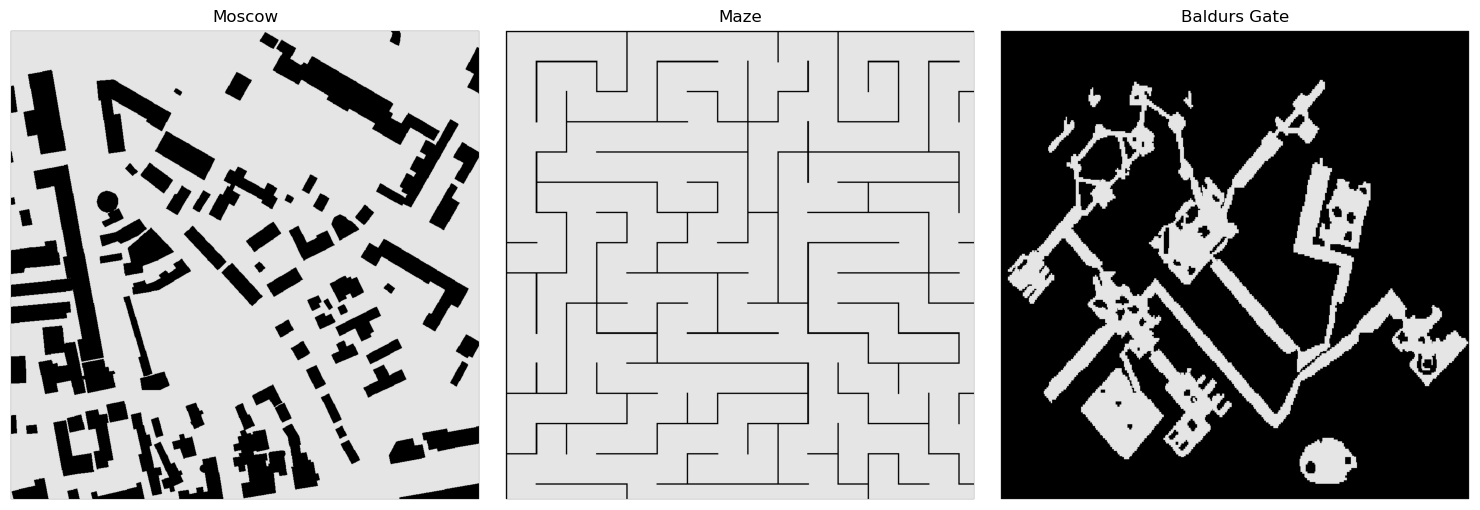

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

img1 = mpimg.imread('data/Moscow_1_1024.png')
img2 = mpimg.imread('data/maze512-32-7.png')
img3 = mpimg.imread('data/AR0307SR.png')

ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)

ax1.set_title('Moscow')
ax2.set_title('Maze')
ax3.set_title('Baldurs Gate')

for ax in (ax1, ax2, ax3):
    ax.axis('off')

plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()

## Описание карт

### Карта 1: Городская (часть Москвы)
Представляет собой фрагмент городской застройки, много свободного пространства и способов дойти от стартовой точки до конечной.

### Карта 2: Baldurs Gate
Отличается уникальной формой препятствий, образующих замкнутые области и длинные коридоры между ними. Для выхода из этих областей необходимо найти проход через окружающие препятствия и узкие места.

### Карта 3: Maze - лабиринт
Лабиринт квадратной формы, отличается прямыми поворотами и регулярностью структуры.

## Особенности тестирования

Разнообразие топологий карт обеспечивает:
- Объективность тестов
- Возможность сравнения алгоритмов между собой
- Оценку эффективности одного алгоритма на разных картах

Также мной были выбраны карты с сопоставимыми максимальными длинами оптимальных путей. Это помогает более наглядно сравнивать результаты работы алгоритмов на выбранных картах.

## Тестируемые варианты алгоритмов

1. Алгоритм A\* без перераскрытий с диагональной эвристикой
2. Алгоритм WA\* без перераскрытий с диагональной эвристикой и параметром w из {1.05, 1.1, 1.5, 2, 3, 5}


## Результаты

Далее представлены диаграммы и графики результатов тестирования. Подробный процесс получения этих результатов и код тестирования доступны в ячейках после графиков и анализа.

## График 1:
#### Доля найденных оптимальных путей правильной длины для различных функций поиска и значений w

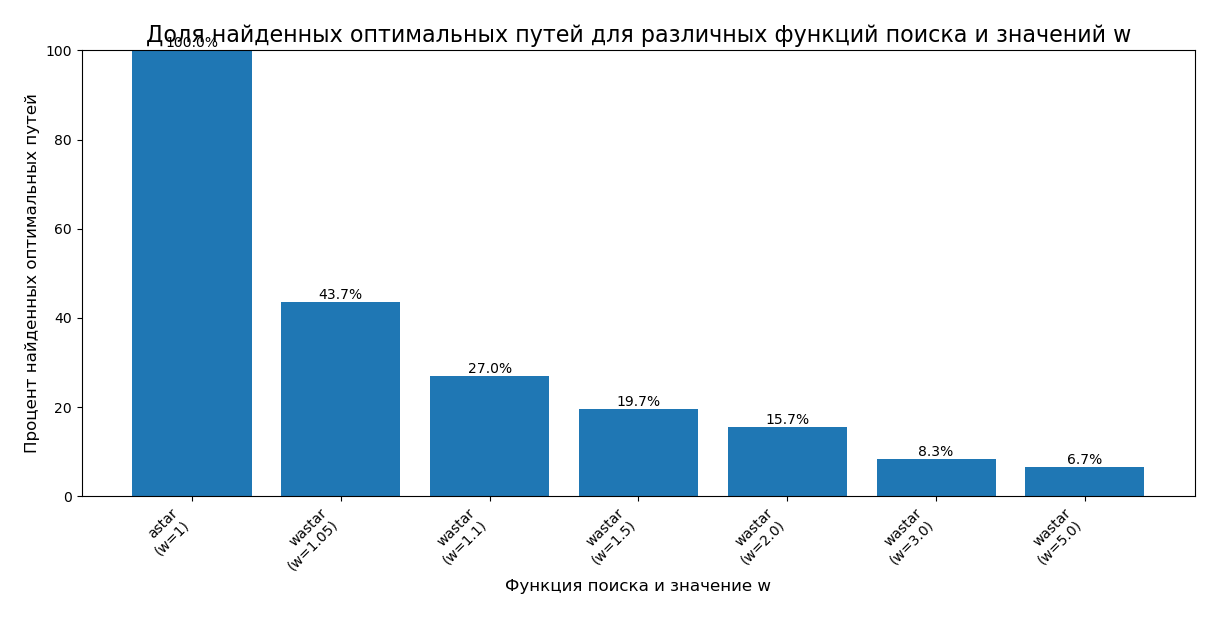

In [117]:
fig = plt.figure(figsize=(12, 6), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/success_rate.png'), aspect='auto')
plt.show()

Как видно из диаграммы, алгоритм A\* ожидаемо находит все пути оптимальной длины. Алгоритм WA\* находит все меньше оптимальных путей с увеличением параметра w.

## График 2:
- #### Зависимость среднего времени выполнения от истинной длины пути для различных карт и алгоритмов (с разделением по картам и общий план)

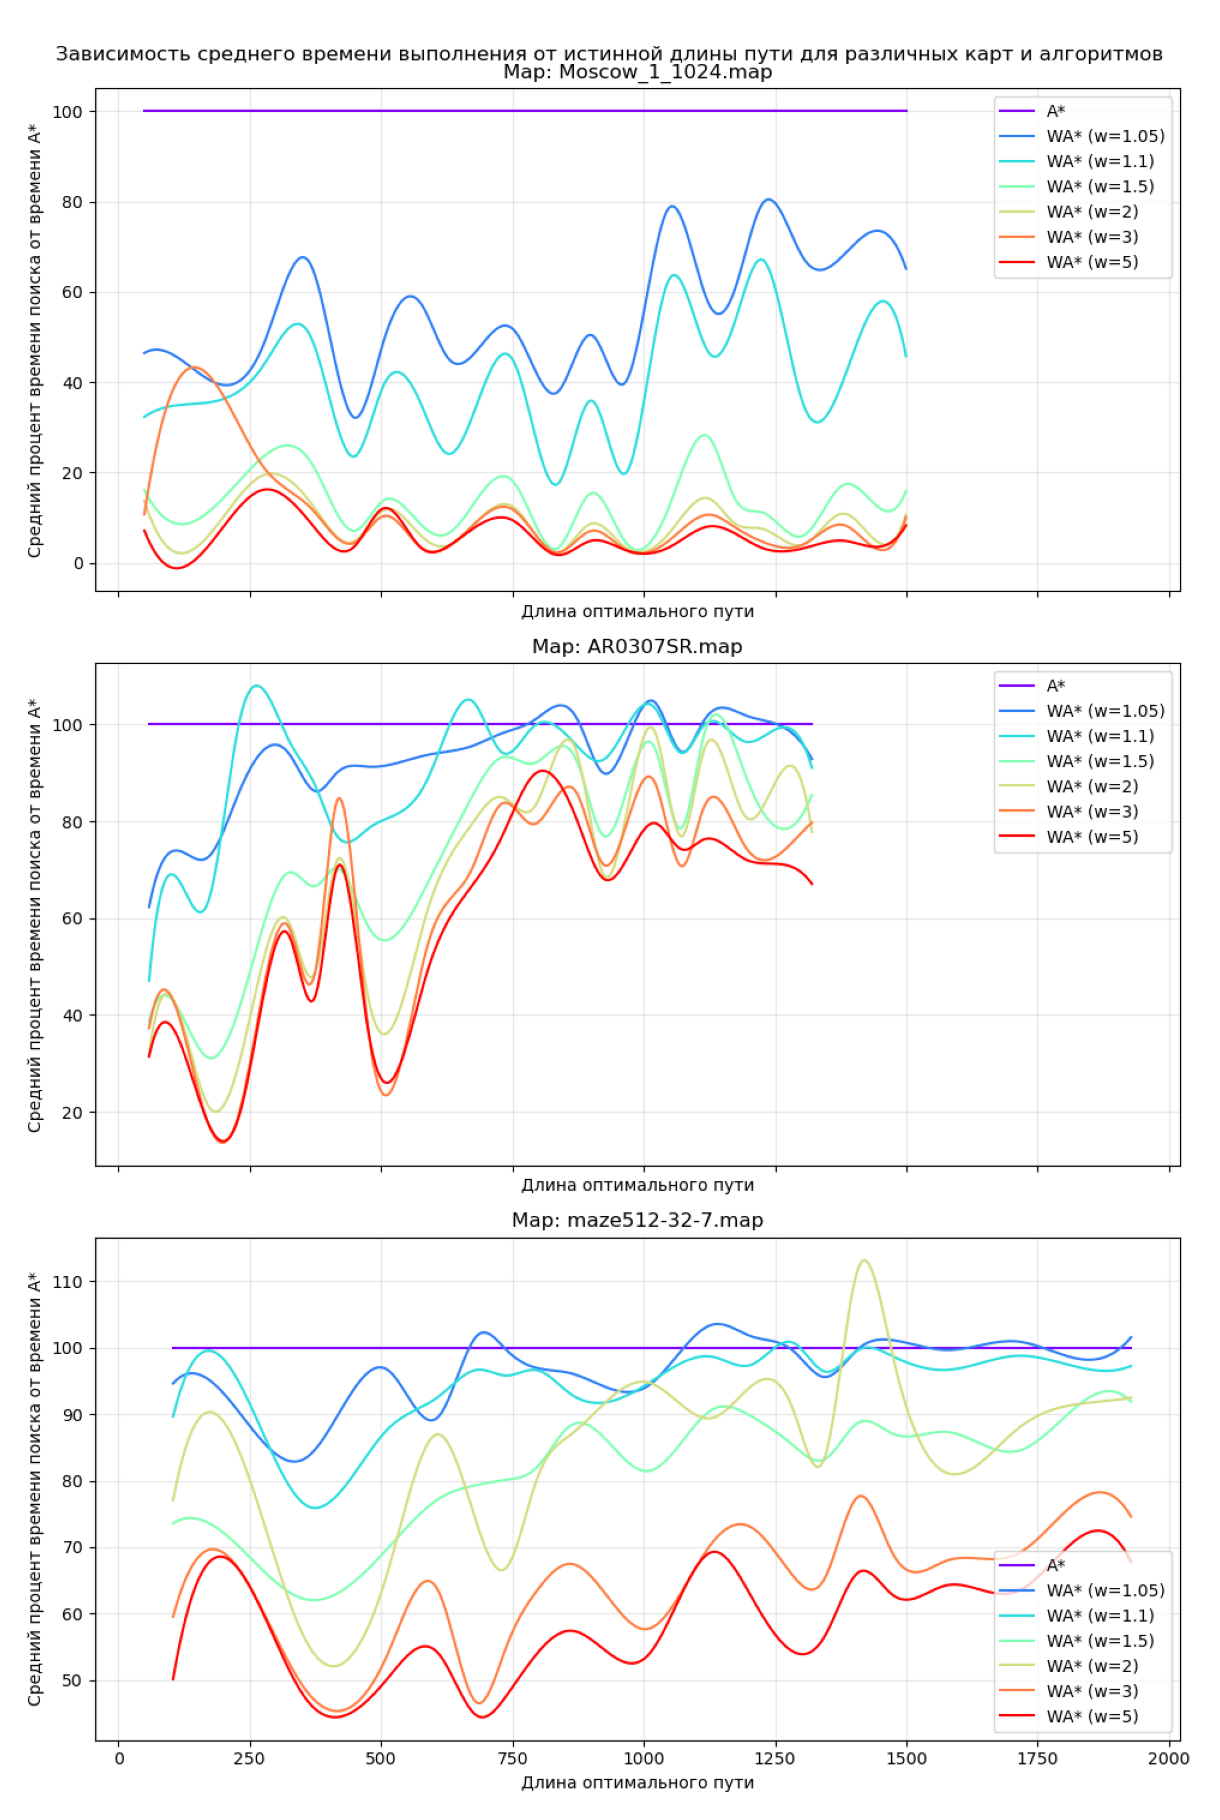

In [94]:
fig = plt.figure(figsize=(12, 18), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/runtime_length.png'), aspect='auto')
plt.show()

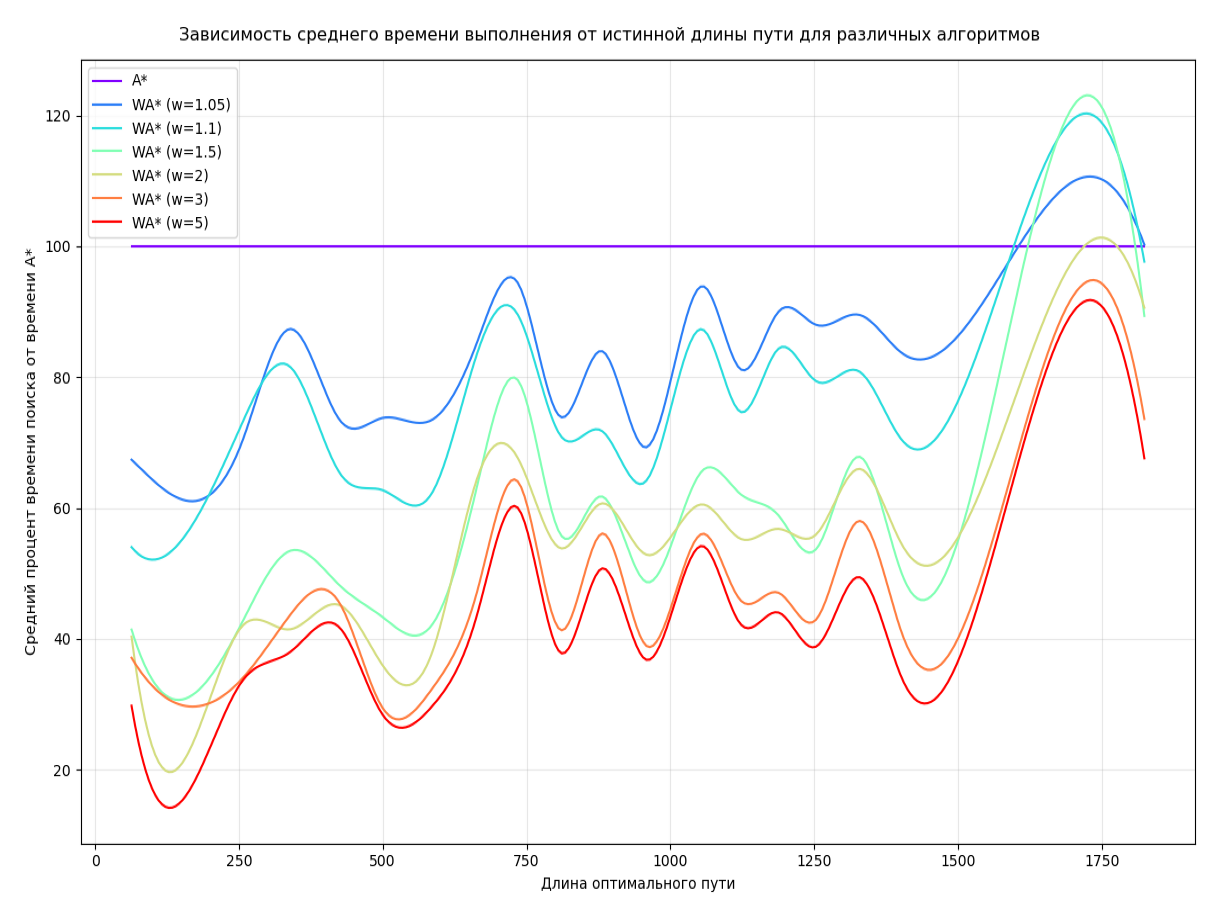

In [95]:
fig = plt.figure(figsize=(12, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/runtime_length_combined.png'), aspect='auto')
plt.show()

На данных графиках для каждого проведенного эксперимента время работы алгоритма A\* принято за 100% и для алгоритма WA\* с каждым значением параметра w строится время работы в процентах от A\*. При этом эксперименты были равномерно разделены на 20 частей (равное число экспериментов в каждой) и значение времени работы для каждого алгоритма было усреднено по своей доле для большей наглядности графика. Затем каждая из линий на графиках была сглажена (это уже просто для эстетики).

Как можно видеть из представленных графиков, как для всех 3 выбранных карт, так и в совокупности скорость работы алгоритма WA\* выше скорости A\* и нарастает с увеличением параметра w, что соответствует ожидаемому поведению.

Также интересно обратить внимание на то, что для второй и третьей карты с увеличением длины оптимального пути разрыв во времени работы между A\* и WA\* сокращается, в особенности данный эффект заметен при рассмотрении карты игры Baldur Gate. Я затрудняюсь конструктивно объяснить данное наблюдение, однако можно связать его с особенной топологией карты.

Выход кривых алгоритма WA\* над прямой A\* на общем плане в районе 1750 отметки объясняется эффектом от сглаживания линий в области низкой плотности данных.

## График 3:
#### Зависимость средней длины пути от истинной длины пути для различных карт и алгоритмов (с разделением по картам и общий план)

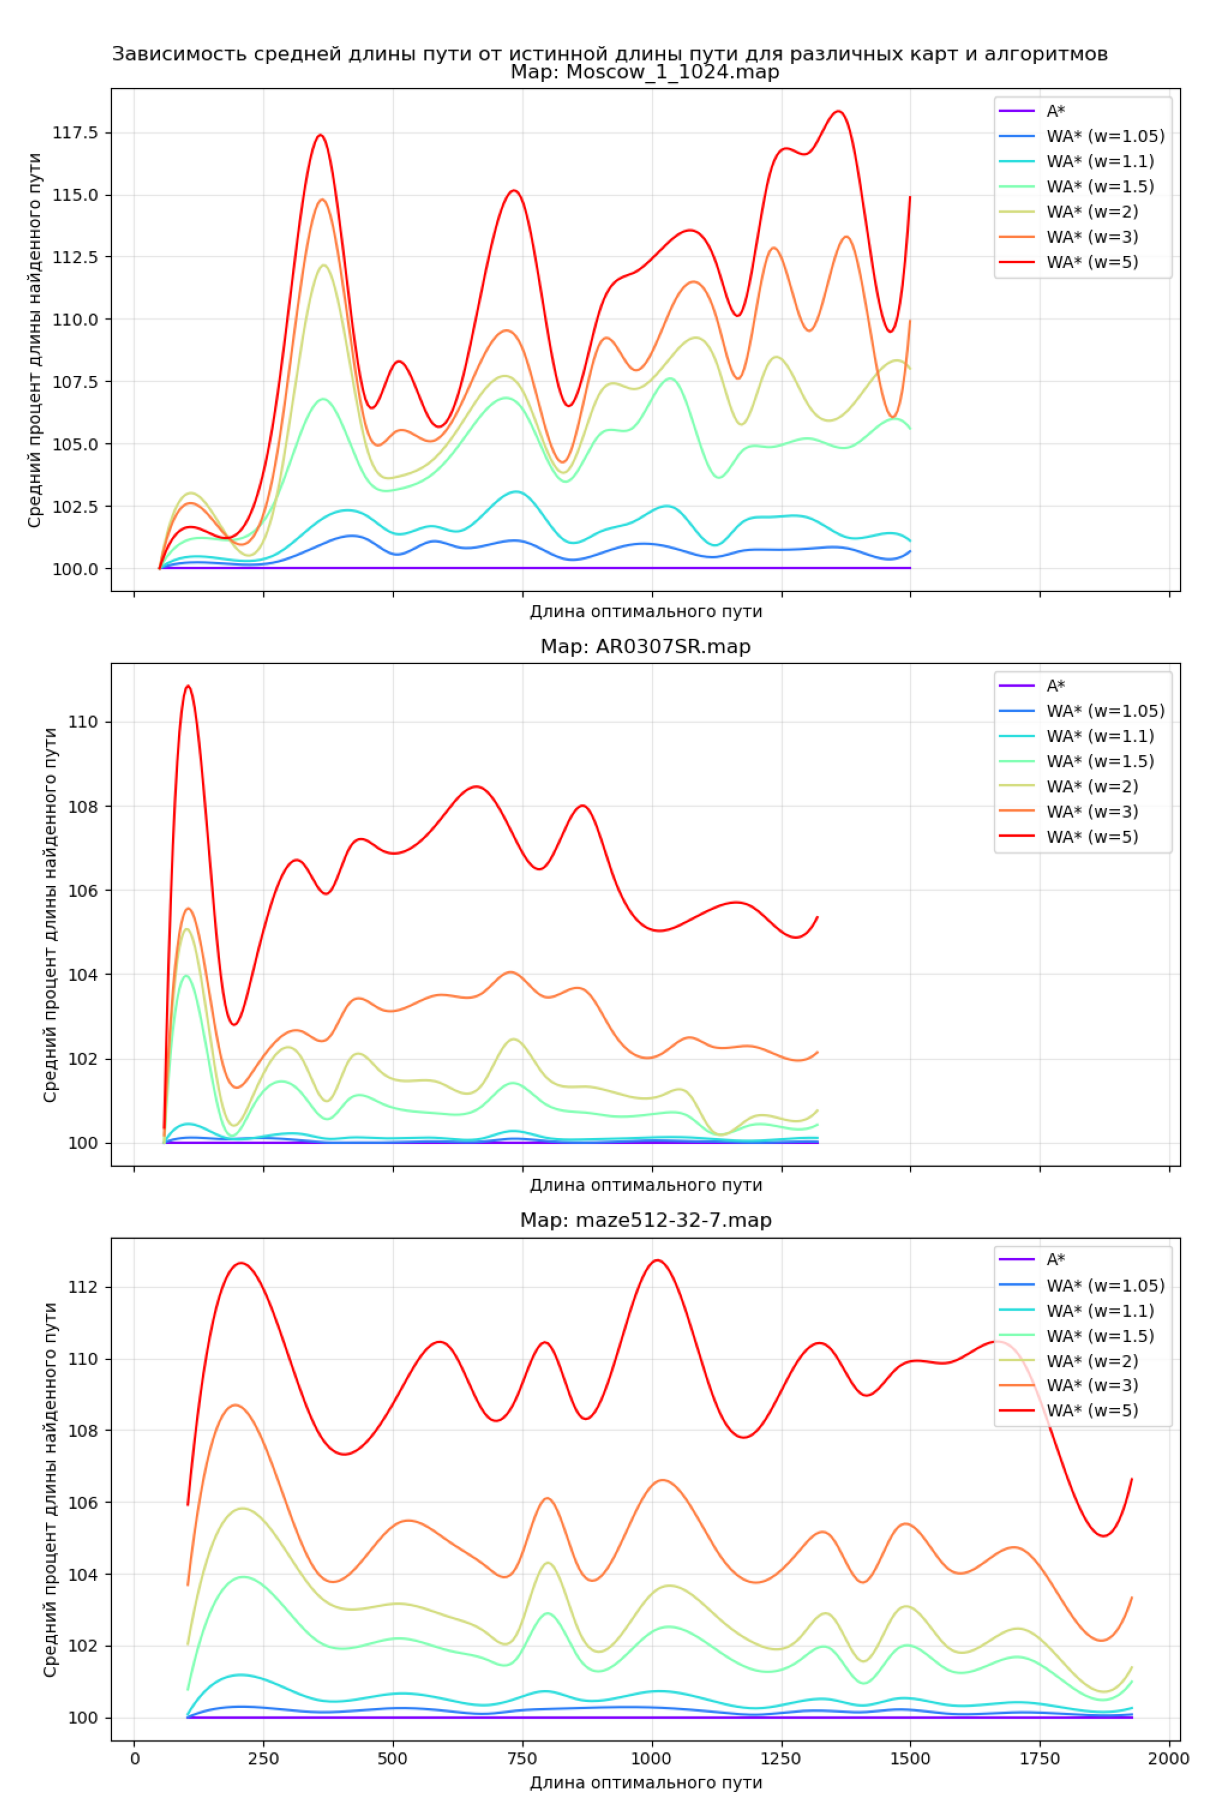

In [96]:
fig = plt.figure(figsize=(12, 18), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/path_length.png'), aspect='auto')
plt.show()

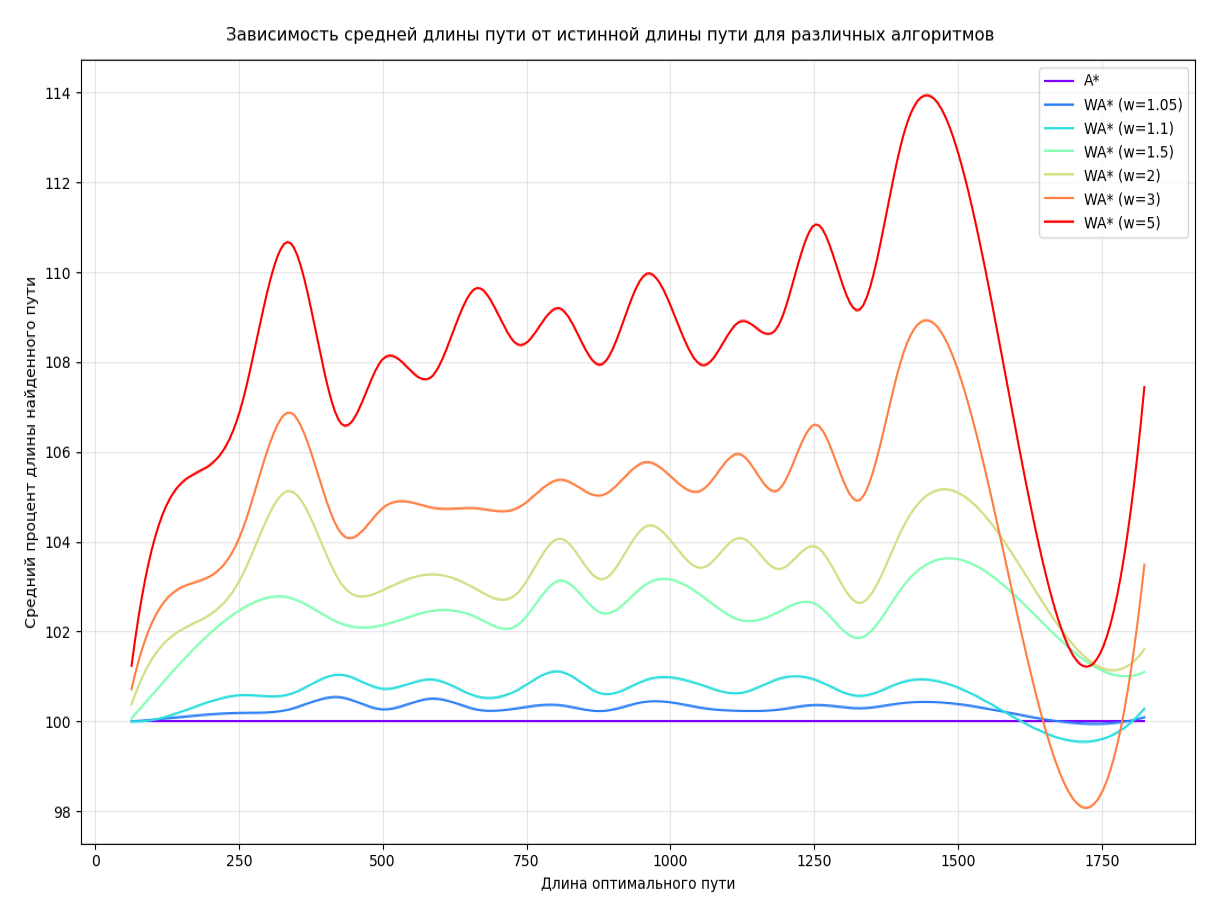

In [99]:
fig = plt.figure(figsize=(12, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/path_length_combined.png'), aspect='auto')
plt.show()

На данных графиках для каждого проведенного эксперимента длина пути, найденная алгоритмом A\* (то есть оптимальная длина пути) принята за 100% и для алгоритма WA\* с каждым значением параметра w строится найденная им длина пути в процентах от A\*. При этом эксперименты были равномерно разделены на 20 частей (равное число экспериментов в каждой) и значение длины пути для каждого алгоритма было усреднено по своей доле для большей наглядности графика. Затем каждая из линий на графиках была сглажена (это уже просто для эстетики).

Как можно видеть из представленных графиков, как для всех 3 выбранных карт, так и в совокупности длины путей, находимых алгоритмом WA\*, больше длины пути для A\* и эта разница нарастает с увеличением параметра w, что соответствует ожидаемому поведению.

Также интересно обратить внимание на то, что для городской карты Москвы процент отклонения в среднем наибольший.
 
Несмотря на то, что в среднем процент отклонения для WA\* от длины оптимального пути остается неизменным, на начальном этапе при оптимальных длинах в диапазоне от 100 до 400 для каждой из карт наблюдается резкий скачок отклонения.

Выход кривых алгоритма WA\* под прямую A\* на общем плане в районе 1750 отметки вновь объясняется подлым эффектом от сглаживания линий в области низкой плотности данных.

## График 4:
#### Соотношение времени выполнения и длины пути для различных алгоритмов (с разделением по картам и общий план)

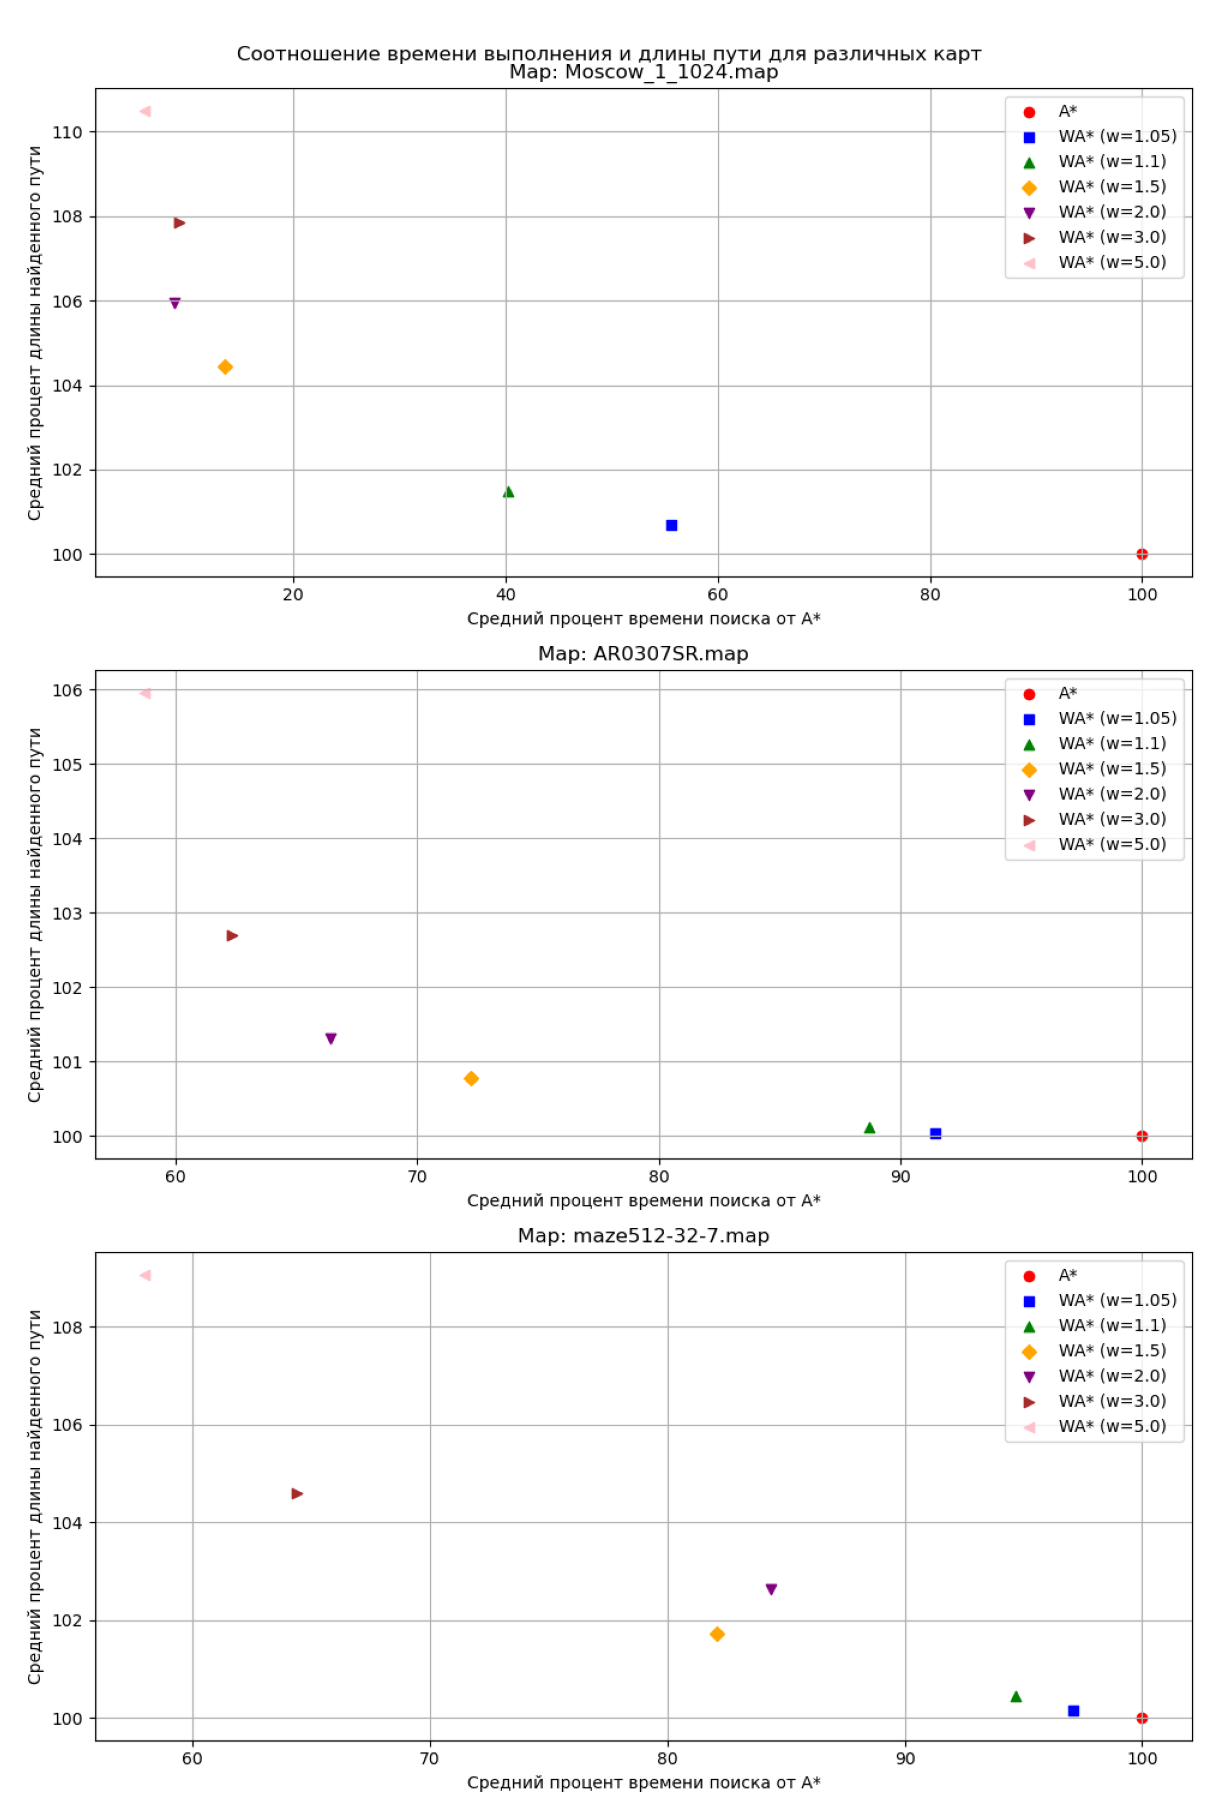

In [113]:
fig = plt.figure(figsize=(12, 18), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/runtime_path_points.png'), aspect='auto')
plt.show()

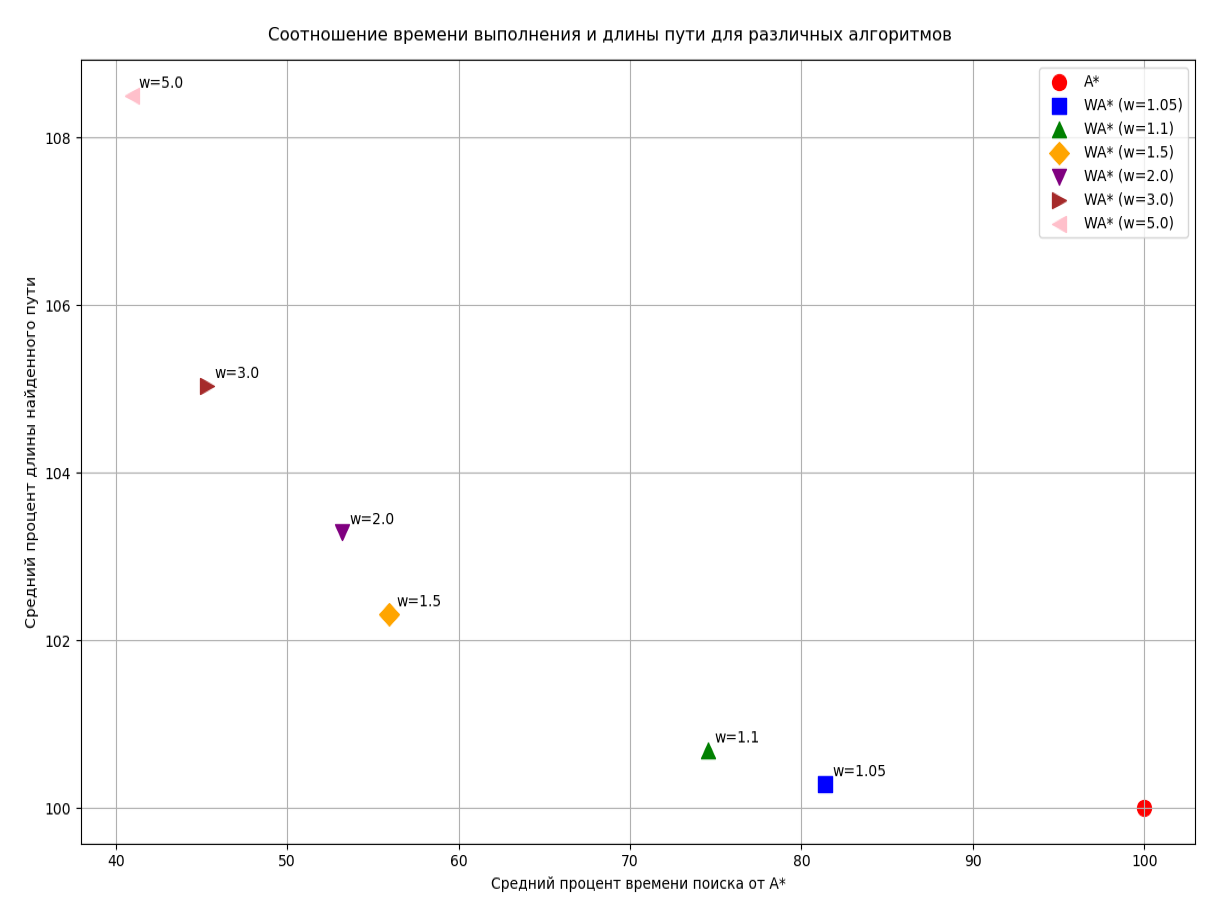

In [101]:
fig = plt.figure(figsize=(12, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/runtime_path_points_combined.png'), aspect='auto')
plt.show()

Данный график наглядно совмещает в себе данные с графиков 2 и 3, демонстрируя кривую эффективности сравниваемых алгоритмов по соотношению средней ошибки в длине пути и времени работы.

Можно также отметить, что для карты лабиринта среднее время работы алгоритма WA\* с параметром w = 2.0 оказалось выше, чем с параметром w = 1.5. Наиболее рациональное объяснение этому эффекту - недостаточное число экспериментов для восстановления нормальной зависимости.

## График 5:
#### Соотношение количества шагов и длины пути для различных алгоритмов (с разделением по картам и общий план)

График для карт по отдельности можно раскрыть при необходимости. Он повторяет тенденции общего графика.

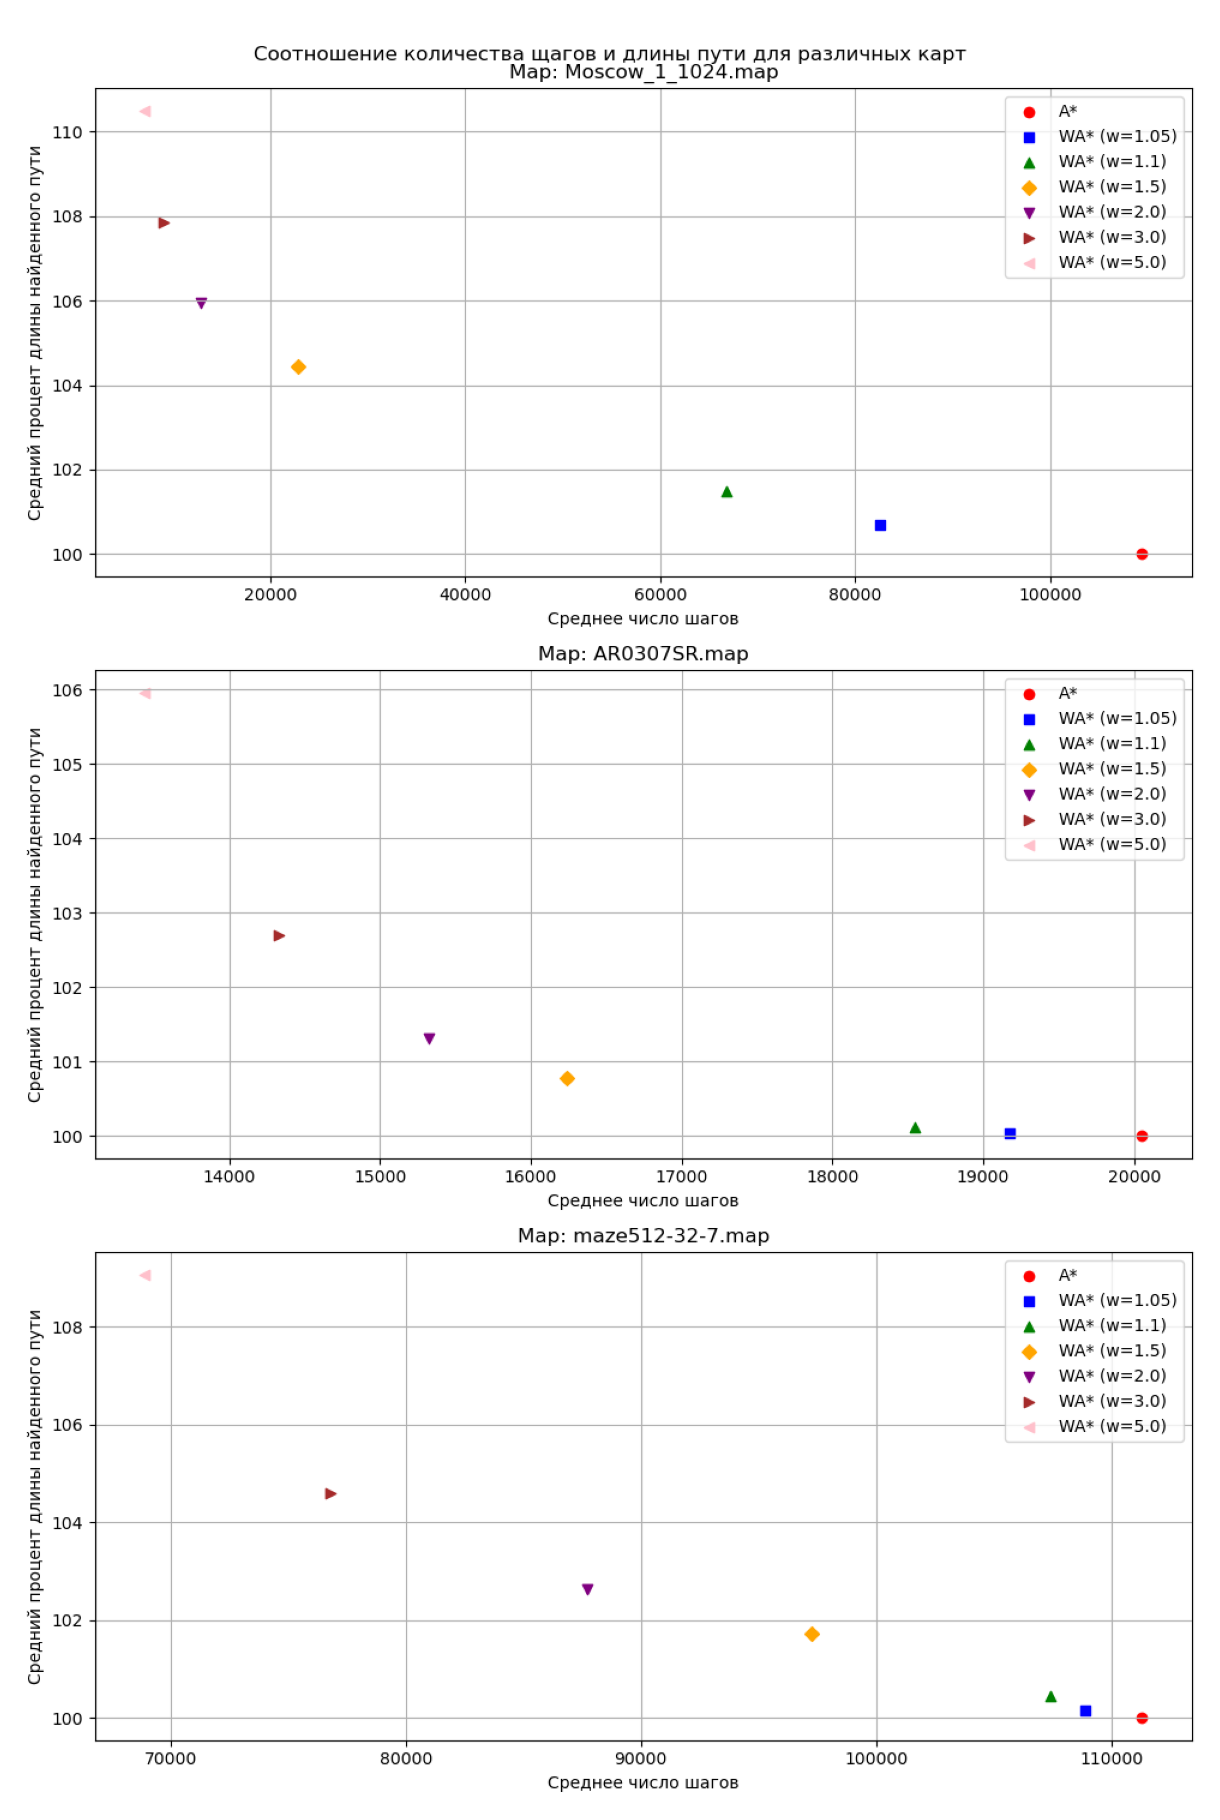

In [115]:
fig = plt.figure(figsize=(12, 18), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/steps_path_points.png'), aspect='auto')
plt.show()

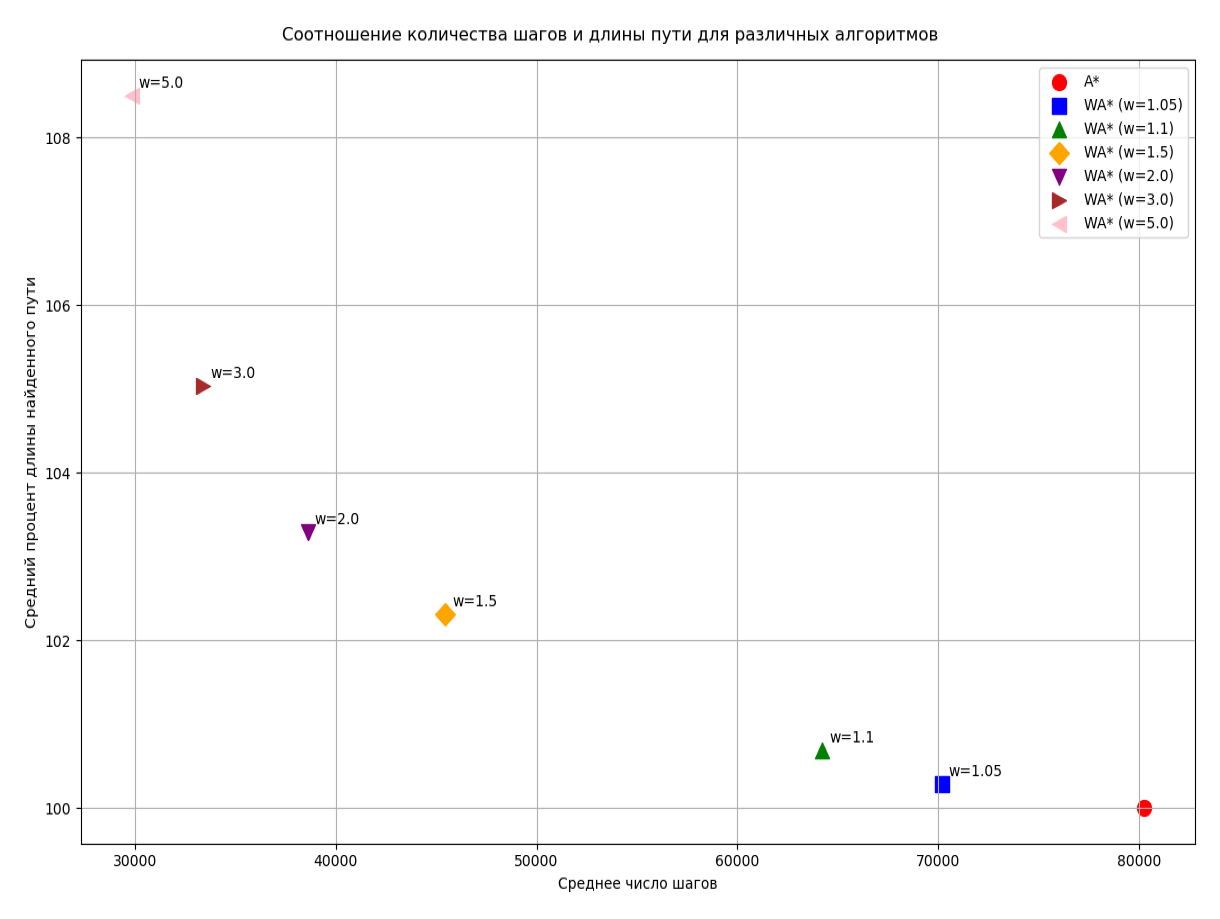

In [107]:
fig = plt.figure(figsize=(12, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/steps_path_points_combined.png'), aspect='auto')
plt.show()

Аналогичных график с заменой среднего времени работы на количество шагов алгоритма. Кривая получается аналогичной. Действительно, учитывая идентичный принцип работы сравниваемых алгоритмов, время работы прямо зависит от числа шагов.

## Выводы

#### Данная работа подтвердила теоретические выводы о сравнительных характеристиках алгоритмов A\* и WA\\*.

- #### Длины путей, находимых WA\*, не являются оптимальными в отличии от A\*, и увеличиваются с ростом параметра w.
- #### Время работы WA* меньше, чем время работы A\*. С ростом параметра w алгоритм WA\* заметно увеличивает скорость выполнения.
- #### При выборе алгоритма и параметра для конкретной задачи следует ориентироваться на допустимый уровень отклонения длины пути от оптимальной и кривую, демонстрирующую tradeoff.

## Алгоритмическая часть

In [2]:
class Map:
    """
    Represents a square grid environment for our moving agent.

    Attributes
    ----------
    _width : int
        The number of columns in the grid.

    _height : int
        The number of rows in the grid.

    _cells : np.ndarray
        A binary matrix representing the grid where 0 represents a traversable cell, and 1 represents a blocked cell.
    """

    def __init__(self, cells: npt.NDArray):
        """
        Initializes the map using a 2D array of cells.

        Parameters
        ----------
        cells : np.ndarray
            A binary matrix representing the grid. 0 indicates a traversable cell, and 1 indicates a blocked cell.
        """
        self._width = cells.shape[1]
        self._height = cells.shape[0]
        self._cells = cells

    def in_bounds(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is within the grid boundaries.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is inside the grid, False otherwise.
        """
        return 0 <= j < self._width and 0 <= i < self._height

    def traversable(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is not an obstacle.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is traversable, False if it's blocked.
        """
        return not self._cells[i, j]

    def get_neighbors(self, i: int, j: int) -> List[Tuple[int, int]]:
        """
        Gets a list of neighboring cells as (i, j) tuples.
        Assumes that the grid is 4-connected, allowing moves only in cardinal directions.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        neighbors : List[Tuple[int, int]]
            List of neighboring cells.
        """    
        neighbors = []
        delta_card = ((0, 1), (1, 0), (0, -1), (-1, 0))
        delta_diag = ((1, 1), (1, -1), (-1, 1), (-1, -1))
        
        for dx, dy in delta_card:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj):
                neighbors.append((ni, nj))
        
        for dx, dy in delta_diag:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj) and self.traversable(ni - dx, nj) and self.traversable(ni, nj - dy):
                neighbors.append((ni, nj))
        
        return neighbors

    def get_size(self) -> Tuple[int, int]:
        """
        Returns the size of the grid in cells.

        Returns
        ----------
        (height, width) : Tuple[int, int]
            Number of rows and columns in the grid.
        """
        return self._height, self._width

In [3]:
def convert_string_to_cells(cell_str: str) -> npt.NDArray:
    """
    Converts a string representation of a grid map, with '#' for obstacles and '.' for free cells, into a binary matrix.

    Parameters
    ----------
    cell_str : str
        String containing grid map information ('#' for obstacles and '.' for free cells).

    Returns
    ----------
    cells : np.ndarray
        Binary matrix representing the grid map.
    """
    lines = cell_str.replace(" ", "").split("\n")

    cells = np.array(
        [[1 if char == "@" else 0 for char in line] for line in lines if line],
        dtype=np.int8,
    )
    return cells

In [4]:
def compute_cost(i1: int, j1: int, i2: int, j2: int) -> Union[int, float]:
    """
    Computes the cost of simple moves between cells (i1, j1) and (i2, j2).

    Parameters
    ----------
    i1 : int
        Row number of the first cell in the grid.
    j1 : int
        Column number of the first cell in the grid.
    i2 : int
        Row number of the second cell in the grid.
    j2 : int
        Column number of the second cell in the grid.

    Returns
    ----------
    int | float
        Cost of the move between cells.

    Raises
    ----------
    ValueError
        If trying to compute the cost of a non-supported move (only cardinal moves are supported).
    """
    if abs(i1 - i2) + abs(j1 - j2) == 1:  # Cardinal move
        return 1
    elif abs(i1 - i2) + abs(j1 - j2) == 2:
        return 2 ** 0.5
    else:
        raise ValueError("Trying to compute the cost of a non-supported move! ONLY cardinal moves are supported.")

In [5]:
class Node:
    """
    Represents a search node.

    Attributes
    ----------
    i : int
        Row coordinate of the corresponding grid element.
    j : int
        Column coordinate of the corresponding grid element.
    g : float | int
        g-value of the node.
    h : float | int
        h-value of the node
    f : float | int
        f-value of the node
    parent : Node
        Pointer to the parent node.
    """

    def __init__(
        self,
        i: int,
        j: int,
        g: Union[float, int] = 0,
        h: Union[float, int] = 0,
        f: Optional[Union[float, int]] = None,
        parent: "Node" = None,
    ):
        """
        Initializes a search node.

        Parameters
        ----------
        i : int
            Row coordinate of the corresponding grid element.
        j : int
            Column coordinate of the corresponding grid element.
        g : float | int
            g-value of the node.
        h : float | int
            h-value of the node (always 0 for Dijkstra).
        f : float | int
            f-value of the node (always equal to g-value for Dijkstra).
        parent : Node
            Pointer to the parent node.
        """
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        if f is None:
            self.f = self.g + h
        else:
            self.f = f
        self.parent = parent

    def __eq__(self, other):
        """
        Checks if two search nodes are the same, which is needed to detect duplicates in the search tree.
        """
        return self.i == other.i and self.j == other.j

    def __hash__(self):
        """
        Makes the Node object hashable, allowing it to be used in sets/dictionaries.
        """
        return hash((self.i, self.j))

    def __lt__(self, other):
        """
        Compares the keys (i.e., the f-values) of two nodes, needed for sorting/extracting the best element from OPEN.
        """
        return self.f < other.f

In [6]:
import heapq

class SearchTreePQD:
    """
    SearchTree using a priority queue for OPEN and a dictionary for CLOSED.
    """

    def __init__(self):
        self._open = []  # Priority queue for nodes in OPEN
        heapq.heapify(self._open)
        self._closed = dict()  # Dictionary for nodes in CLOSED (expanded nodes)
        self._enc_open_duplicates = 0  # Number of duplicates encountered in OPEN

    def __len__(self) -> int:
        """
        Returns the size of the search tree. Useful for assessing the memory
        footprint of the algorithm, especially at the final iteration.
        """
        return len(self._open) + len(self._closed)

    def open_is_empty(self) -> bool:
        """
        Checks if OPEN is empty.
        If true, the main search loop should be interrupted.
        """
        return len(self._open) == 0

    def add_to_open(self, item: Node):
        """
        Adds a node to the search tree, specifically to OPEN. This node is either
        entirely new or a duplicate of an existing node in OPEN.
        This implementation detects duplicates lazily; thus, nodes are added to
        OPEN without initial duplicate checks.
        """
        heapq.heappush(self._open, item)

    def get_best_node_from_open(self) -> Optional[Node]:
        """
        Retrieves the best node from OPEN, defined by the minimum key.
        This node will then be expanded in the main search loop.

        Duplicates are managed here. If a node has been expanded previously
        (and is in CLOSED), it's skipped and the next best node is considered.

        Returns None if OPEN is empty.
        """
        while not self.open_is_empty():
            if self.was_expanded(best_node := heapq.heappop(self._open)):
                self._enc_open_duplicates += 1      
            else:
                return best_node
                
        return None

    def add_to_closed(self, item: Node):
        """
        Adds a node to the CLOSED dictionary.
        """
        self._closed[(item.i, item.j)] = item

    def was_expanded(self, item: Node) -> bool:
        """
        Checks if a node has been previously expanded.
        """
        return (item.i, item.j) in self._closed

    @property
    def opened(self):
        return self._open

    @property
    def expanded(self):
        return self._closed.values()

    @property
    def number_of_open_duplicates(self):
        return self._enc_open_duplicates

In [7]:
def read_task_from_file(
    path: str,
    exp_num: int,
) -> Tuple[npt.NDArray, int, int, int, int, float, int]:
    """
    Reads map, start/goal positions, and true value of path length between the given start and goal from a file.

    Parameters
    ----------
    path : str
        Path to a file with the pathfinding problem instance.

    Returns
    -------
    cells : npt.NDArray
        Matrix of grid map cells.
    start_i, start_j : int, int
        Position of the start cell in the grid.
    goal_i, goal_j : int, int
        Position of the goal cell in the grid.
    length : float
        True value of the path's length between the given start and goal.
    """
    with open(path, 'r') as file:
        for i, line in enumerate(file, 1):
            if i == exp_num + 1:
                elements = line.strip().split('\t')
    
    _, map_name, width, height, start_x, start_y, goal_x, goal_y, optimal_length = elements
        
    width = int(width)
    height = int(height)
    start_i = int(start_y)
    start_j = int(start_x)
    goal_i = int(goal_y)
    goal_j = int(goal_x)
    length = float(optimal_length)
                
    return map_name, start_i, start_j, goal_i, goal_j, length, height

In [8]:
def octile_distance(i1: int, j1: int, i2: int, j2: int) -> float:
    """
    Computes the Octile (diagonal) distance between two cells on a grid.

    Parameters
    ----------
    i1, j1 : int
        (i, j) coordinates of the first cell on the grid.
    i2, j2 : int
        (i, j) coordinates of the second cell on the grid.

    Returns
    -------
    float
        Octile distance between the two cells.
    """
    dx = abs(i1 - i2)
    dy = abs(j1 - j2)
    return max(dx, dy) + (2**0.5 - 1) * min(dx, dy)

In [10]:
def wastar(
    task_map: Map,
    start_i: int,
    start_j: int,
    goal_i: int,
    goal_j: int,
    heuristic_func: Callable,
    search_tree: Type[SearchTreePQD],
    w: float,
) -> Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]:
    """
    Implements the WA* search algorithm.

    Parameters
    ----------
    task_map : Map
        The grid or map being searched.
    start_i, start_j : int, int
        Starting coordinates.
    goal_i, goal_j : int, int
        Goal coordinates.
    heuristic_func : Callable
        Heuristic function for estimating the distance from a node to the goal.
    search_tree : Type[SearchTreePQD]
        The search tree to use.
    w : float

    Returns
    -------
    Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]
        Tuple containing:
        - A boolean indicating if a path was found.
        - The last node in the found path or None.
        - Number of algorithm iterations.
        - Size of the resultant search tree.
        - OPEN set nodes for visualization or None.
        - CLOSED set nodes.
    """
    ast = search_tree()
    steps = 0

    start_node = Node(start_i, start_j, g=0, h=w * heuristic_func(start_i, start_j, goal_i, goal_j))
    ast.add_to_open(start_node)

    while not ast.open_is_empty():
        new_node = ast.get_best_node_from_open()
        
        if new_node is None:
            # print("During the search, the following number of OPEN duplicates was encountered: ", ast.number_of_open_duplicates)
            return False, None, steps, len(ast), None, ast.expanded
        
        steps += 1
        ast.add_to_closed(new_node)
        
        i, j = new_node.i, new_node.j
        
        if i == goal_i and j == goal_j:
            # print("During the search, the following number of OPEN duplicates was encountered: ", ast.number_of_open_duplicates)
            return True, new_node, steps, new_node.g, ast.opened, ast.expanded
        
        for ni, nj in task_map.get_neighbors(i, j):
            node_to_open = Node(ni, nj, g=new_node.g + compute_cost(i, j, ni, nj), 
                                h=w * heuristic_func(ni, nj, goal_i, goal_j), parent=new_node)
            if not ast.was_expanded(node_to_open):
                ast.add_to_open(node_to_open)

    return False, None, steps, len(ast), None, ast.expanded

## Эксперименты

In [11]:
np.random.seed(42)

tests = []

map_files = (('data/Moscow_1_1024.map.scen', 3871), ('data/AR0307SR.map.scen', 3381), ('data/maze512-32-7.map.scen', 4941))

for i in range(3):
    
    test_numbers = np.random.randint(0, map_files[i][1], 100)
    
    tests_params = []
    for test_number in test_numbers:
        map_name, start_i, start_j, goal_i, goal_j, length, height = read_task_from_file(map_files[i][0], test_number)
        params = {'start_i': start_i, 'start_j': start_j, 'goal_i': goal_i, 'goal_j': goal_j, 'length': length}
        tests_params.append(params)
    
    tests.append((map_name, height, tests_params))
    

In [12]:
def wa_star_test(w: float):
    
    test_results = pd.DataFrame(columns=['search_function', 'map', 'exp_num', 'path_found', 'path_length', 
                                         'true_path_length', 'steps', 'runtime', 'path_dif', 'w'])
    
    for test_map, height, test_params in tests:
        
        with open('data/' + test_map) as map_file:
            for _ in range(4):
                next(map_file)
                    
            map_lines = [next(map_file) for _ in range(height)]
            map_str = "".join(map_lines)
            cells = convert_string_to_cells(map_str)

        exp_num = 0
                    
        for params in test_params:
            exp_num += 1
            start_time = time.time()
            
            path_found, _, steps, path_length, _, _ = wastar(
                task_map=Map(cells), 
                start_i=params['start_i'], 
                start_j=params['start_j'], 
                goal_i=params['goal_i'], 
                goal_j=params['goal_j'], 
                heuristic_func=octile_distance,
                search_tree=SearchTreePQD,
                w=w
            )
            
            runtime = time.time() - start_time
            
            path_length = round(path_length, 5)
            
            if path_found and path_length == round(params['length'], 5):
                new_row = {'search_function': 'astar' if w == 1 else 'wastar',
                           'map': test_map, 
                           'exp_num': exp_num, 
                           'path_found': 1, 
                           'path_length': path_length, 
                           'true_path_length': round(params['length'], 5),
                           'steps': steps, 
                           'runtime': runtime,
                           'path_dif': 0,
                           'w': w}
                test_results = pd.concat([test_results, pd.DataFrame([new_row])], ignore_index=True)
                
            else:
                new_row = {'search_function': 'astar' if w == 1 else 'wastar',
                           'map': test_map, 
                           'exp_num': exp_num, 
                           'path_found': 0, 
                           'path_length': path_length, 
                           'true_path_length': round(params['length'], 5),
                           'steps': steps, 
                           'runtime': runtime,
                           'path_dif': abs(path_length - round(params['length'], 5)),
                           'w': w}
                test_results = pd.concat([test_results, pd.DataFrame([new_row])], ignore_index=True)
                                
    return test_results

In [43]:
# from joblib import Parallel, delayed
# 
# w_list = (1, 1.05, 1.1, 1.5, 2, 3, 5)
# 
# with Parallel(n_jobs=7, verbose=10) as parallel:
#     wa_results = parallel(delayed(wa_star_test)(w) for w in w_list)

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:  9.2min
[Parallel(n_jobs=7)]: Done   2 out of   7 | elapsed: 10.4min remaining: 25.9min
[Parallel(n_jobs=7)]: Done   3 out of   7 | elapsed: 11.8min remaining: 15.7min
[Parallel(n_jobs=7)]: Done   4 out of   7 | elapsed: 13.5min remaining: 10.2min
[Parallel(n_jobs=7)]: Done   5 out of   7 | elapsed: 18.3min remaining:  7.3min
[Parallel(n_jobs=7)]: Done   7 out of   7 | elapsed: 21.2min finished


In [ ]:
w_list = (1, 1.05, 1.1, 1.5, 2, 3, 5)

wa_results_2 = []

for w in w_list:
    res_w = wa_star_test(w)
    wa_results_2.append(res_w)

In [14]:
test_results = pd.concat(wa_results_2, ignore_index=True)

In [15]:
import pandas as pd
import numpy as np

astar_base = test_results[test_results['search_function'] == 'astar'].groupby(['map', 'exp_num'])[['runtime', 'path_length']].first().reset_index()
astar_base = astar_base.rename(columns={'runtime': 'astar_runtime', 'path_length': 'astar_path_length'})


test_results = pd.merge(test_results, astar_base, on=['map', 'exp_num'], how='left')

test_results['runtime_ratio'] = np.where(
    test_results['search_function'] == 'astar',
    100,
    test_results['runtime'] * 100 / test_results['astar_runtime']
)

test_results['path_length_ratio'] = np.where(
    test_results['search_function'] == 'astar',
    100,
    test_results['path_length'] * 100 / test_results['astar_path_length']
)

test_results = test_results.drop(['astar_runtime', 'astar_path_length'], axis=1)

## Построение графиков

### График 1

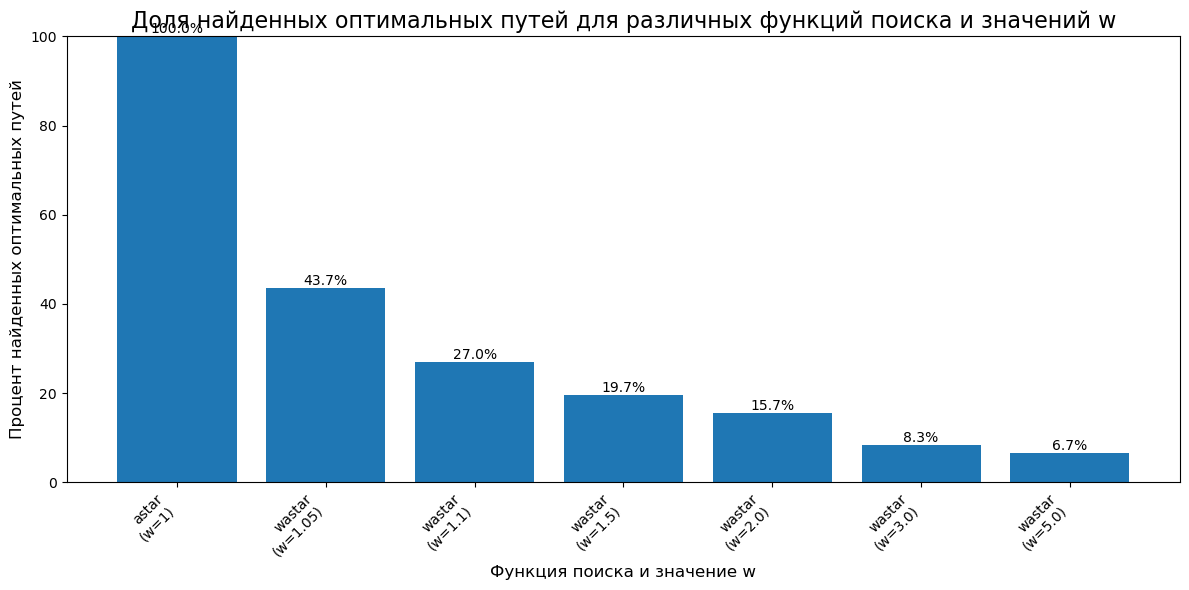

In [116]:
import matplotlib.pyplot as plt

grouped = test_results.groupby(['search_function', 'w'])['path_found'].mean().reset_index()

grouped['percentage'] = grouped['path_found'] * 100

grouped = grouped.sort_values('w')

labels = [f"astar\n(w=1)"] + [f"wastar\n(w={w})" for w in grouped[grouped['search_function'] == 'wastar']['w']]


plt.figure(figsize=(12, 6))

bars = plt.bar(range(len(grouped)), grouped['percentage'], align='center')

plt.title('Доля найденных оптимальных путей для различных функций поиска и значений w', fontsize=16)
plt.xlabel('Функция поиска и значение w', fontsize=12)
plt.ylabel('Процент найденных оптимальных путей', fontsize=12)
plt.xticks(range(len(grouped)), labels, rotation=45, ha='right')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('plots_png/success_rate.png')
plt.show()

### График 2

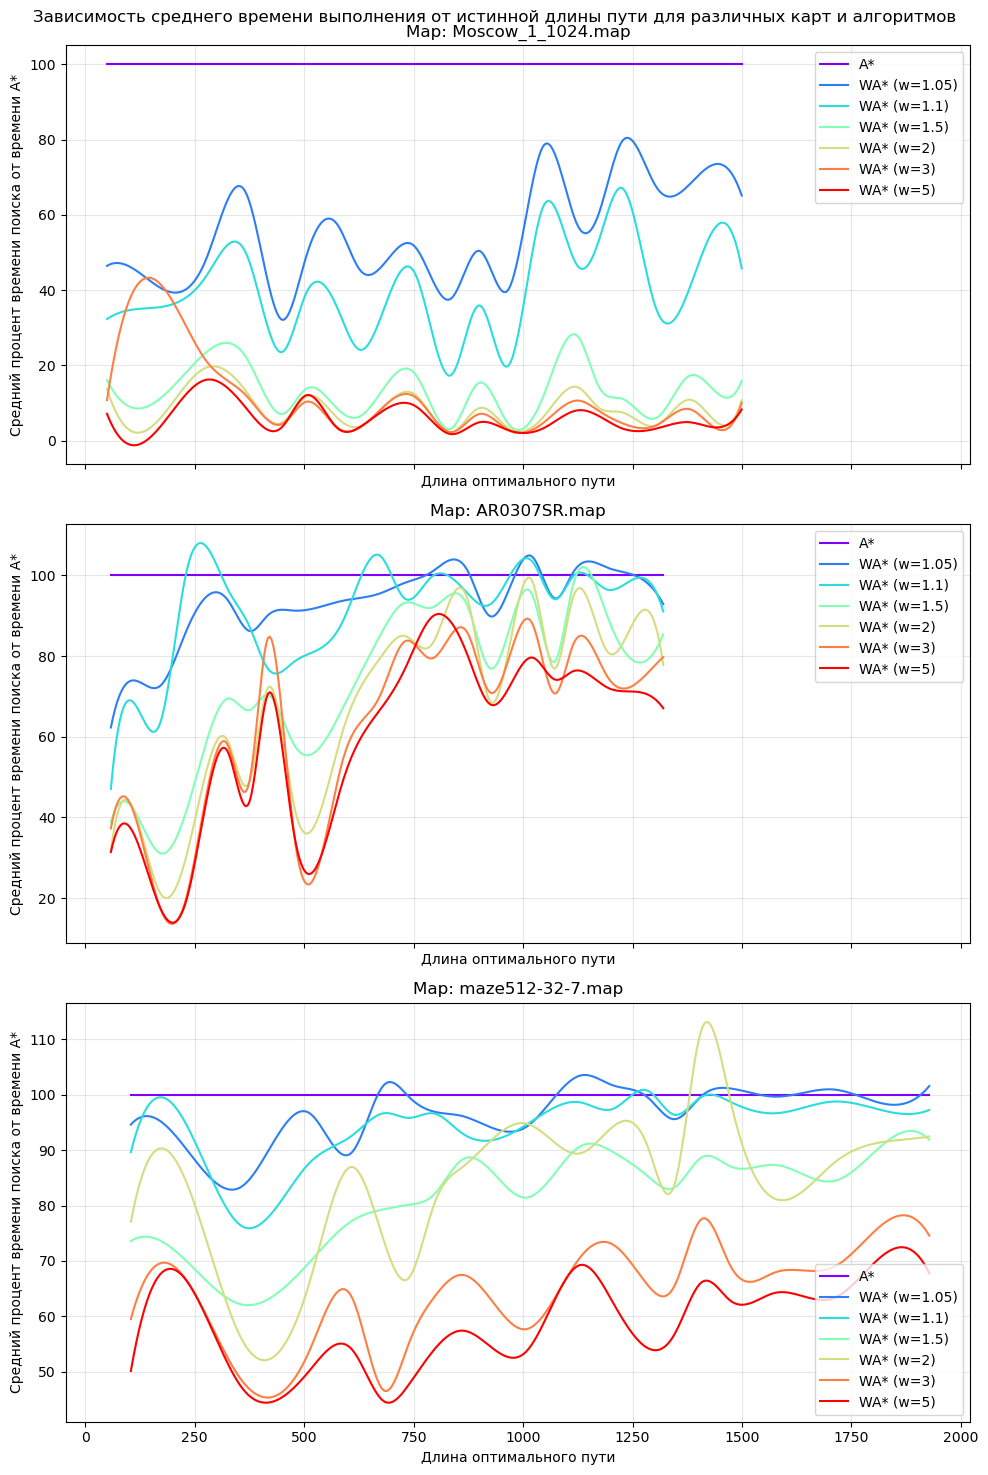

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def split_and_average(data, n_parts=20):
    data_sorted = data.sort_values('true_path_length')
    
    part_size = len(data) // n_parts
    
    averaged_data = []
    
    for i in range(n_parts):
        start_idx = i * part_size
        end_idx = (i + 1) * part_size if i < n_parts - 1 else len(data)
        
        part_data = data_sorted.iloc[start_idx:end_idx]
        
        avg_length = part_data['true_path_length'].mean()
        avg_ratio = part_data['runtime_ratio'].mean()
        
        averaged_data.append({'true_path_length': avg_length, 'runtime_ratio': avg_ratio})
    
    return pd.DataFrame(averaged_data)

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Зависимость среднего времени выполнения от истинной длины пути для различных карт и алгоритмов')

colors = plt.cm.rainbow(np.linspace(0, 1, 7))

for i, map_type in enumerate(['Moscow_1_1024.map', 'AR0307SR.map', 'maze512-32-7.map']):
    ax = axs[i]
    ax.set_title(f'Map: {map_type}')
    ax.set_xlabel('Длина оптимального пути')
    ax.set_ylabel('Средний процент времени поиска от времени A*')
    
    astar_data = test_results[(test_results['map'] == map_type) & 
                              (test_results['search_function'] == 'astar')]
    astar_avg = split_and_average(astar_data)

    x_new = np.linspace(astar_avg['true_path_length'].min(), astar_avg['true_path_length'].max(), 300)
    spline = make_interp_spline(astar_avg['true_path_length'], astar_avg['runtime_ratio'], k=3)
    y_smooth = spline(x_new)
    
    ax.plot(x_new, y_smooth, label='A*', color=colors[0])
    
    for j, w in enumerate([1.05, 1.1, 1.5, 2, 3, 5]):
        wastar_data = test_results[(test_results['map'] == map_type) & 
                                   (test_results['search_function'] == 'wastar') & 
                                   (test_results['w'] == w)]
        if not wastar_data.empty:
            wastar_avg = split_and_average(wastar_data)

            x_new_wastar = np.linspace(wastar_avg['true_path_length'].min(), wastar_avg['true_path_length'].max(), 300)
            spline_wastar = make_interp_spline(wastar_avg['true_path_length'], wastar_avg['runtime_ratio'], k=3)
            y_smooth_wastar = spline_wastar(x_new_wastar)

            ax.plot(x_new_wastar, y_smooth_wastar, label=f'WA* (w={w})', color=colors[j+1])
    
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_png/runtime_length.png')
plt.show()

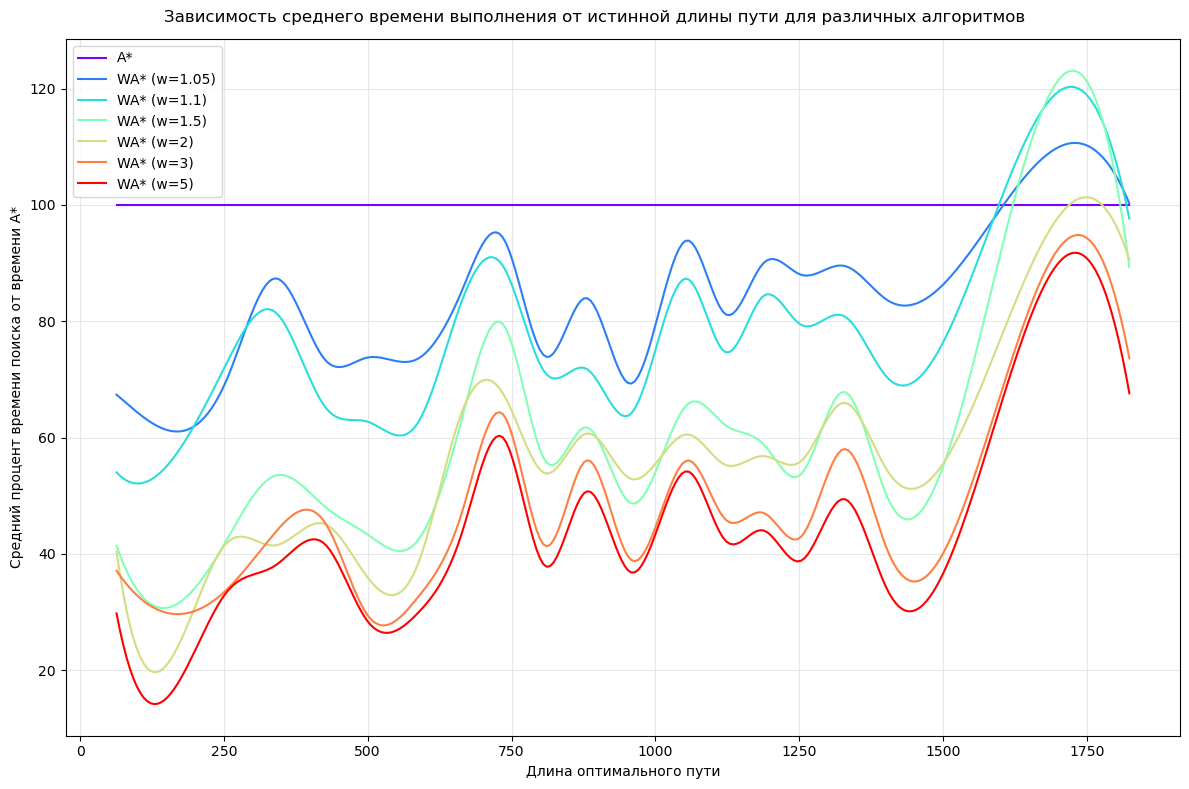

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import pandas as pd

def split_and_average(data, n_parts=20):
    data_sorted = data.sort_values('true_path_length')
    
    part_size = len(data) // n_parts
    
    averaged_data = []
    
    for i in range(n_parts):
        start_idx = i * part_size
        end_idx = (i + 1) * part_size if i < n_parts - 1 else len(data)
        
        part_data = data_sorted.iloc[start_idx:end_idx]
        
        avg_length = part_data['true_path_length'].mean()
        avg_ratio = part_data['runtime_ratio'].mean()
        
        averaged_data.append({'true_path_length': avg_length, 'runtime_ratio': avg_ratio})
    
    return pd.DataFrame(averaged_data)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Зависимость среднего времени выполнения от истинной длины пути для различных алгоритмов')

colors = plt.cm.rainbow(np.linspace(0, 1, 7))

ax.set_xlabel('Длина оптимального пути')
ax.set_ylabel('Средний процент времени поиска от времени A*')

astar_data = test_results[test_results['search_function'] == 'astar']
astar_avg = split_and_average(astar_data)

x_new = np.linspace(astar_avg['true_path_length'].min(), astar_avg['true_path_length'].max(), 300)
spline = make_interp_spline(astar_avg['true_path_length'], astar_avg['runtime_ratio'], k=3)
y_smooth = spline(x_new)

ax.plot(x_new, y_smooth, label='A*', color=colors[0])

for j, w in enumerate([1.05, 1.1, 1.5, 2, 3, 5]):
    wastar_data = test_results[(test_results['search_function'] == 'wastar') & 
                               (test_results['w'] == w)]
    if not wastar_data.empty:
        wastar_avg = split_and_average(wastar_data)

        x_new_wastar = np.linspace(wastar_avg['true_path_length'].min(), wastar_avg['true_path_length'].max(), 300)
        spline_wastar = make_interp_spline(wastar_avg['true_path_length'], wastar_avg['runtime_ratio'], k=3)
        y_smooth_wastar = spline_wastar(x_new_wastar)

        ax.plot(x_new_wastar, y_smooth_wastar, label=f'WA* (w={w})', color=colors[j+1])

ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_png/runtime_length_combined.png')
plt.show()

### График 3

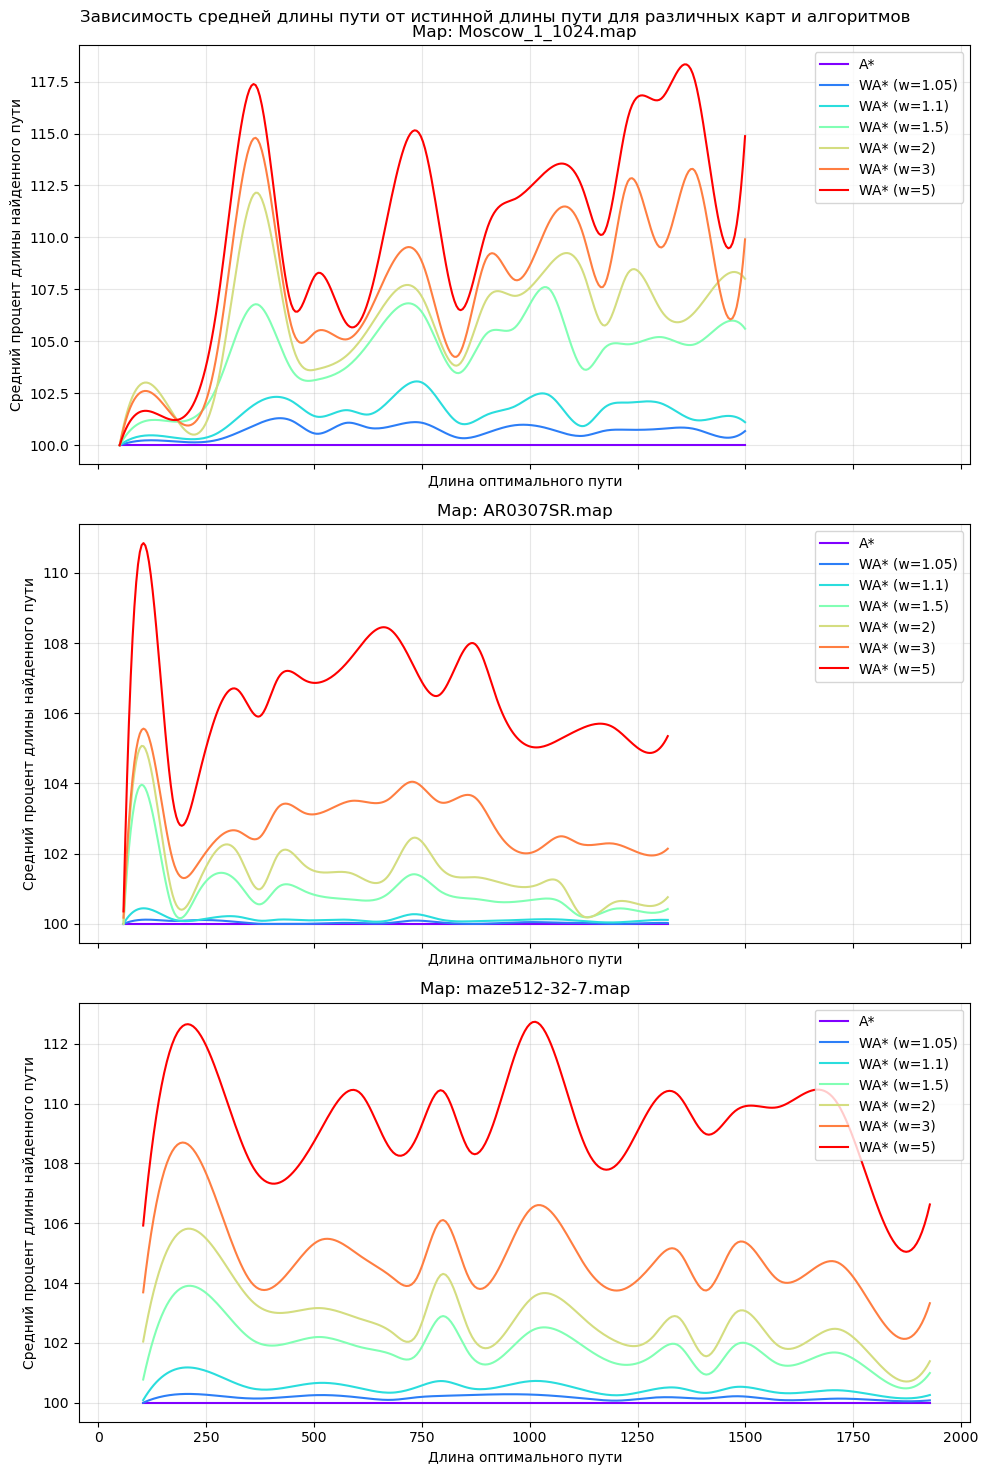

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def split_and_average(data, n_parts=20):
    data_sorted = data.sort_values('true_path_length')
    
    part_size = len(data) // n_parts
    
    averaged_data = []
    
    for i in range(n_parts):
        start_idx = i * part_size
        end_idx = (i + 1) * part_size if i < n_parts - 1 else len(data)
        
        part_data = data_sorted.iloc[start_idx:end_idx]
        
        avg_length = part_data['true_path_length'].mean()
        avg_ratio = part_data['path_length_ratio'].mean()
        
        averaged_data.append({'true_path_length': avg_length, 'path_length_ratio': avg_ratio})
    
    return pd.DataFrame(averaged_data)

fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Зависимость средней длины пути от истинной длины пути для различных карт и алгоритмов')

colors = plt.cm.rainbow(np.linspace(0, 1, 7))

for i, map_type in enumerate(['Moscow_1_1024.map', 'AR0307SR.map', 'maze512-32-7.map']):
    ax = axs[i]
    ax.set_title(f'Map: {map_type}')
    ax.set_xlabel('Длина оптимального пути')
    ax.set_ylabel('Средний процент длины найденного пути')
    
    astar_data = test_results[(test_results['map'] == map_type) & 
                              (test_results['search_function'] == 'astar')]
    astar_avg = split_and_average(astar_data)

    x_new = np.linspace(astar_avg['true_path_length'].min(), astar_avg['true_path_length'].max(), 300)
    spline = make_interp_spline(astar_avg['true_path_length'], astar_avg['path_length_ratio'], k=3)
    y_smooth = spline(x_new)
    
    ax.plot(x_new, y_smooth, label='A*', color=colors[0])
    
    for j, w in enumerate([1.05, 1.1, 1.5, 2, 3, 5]):
        wastar_data = test_results[(test_results['map'] == map_type) & 
                                   (test_results['search_function'] == 'wastar') & 
                                   (test_results['w'] == w)]
        if not wastar_data.empty:
            wastar_avg = split_and_average(wastar_data)

            x_new_wastar = np.linspace(wastar_avg['true_path_length'].min(), wastar_avg['true_path_length'].max(), 300)
            spline_wastar = make_interp_spline(wastar_avg['true_path_length'], wastar_avg['path_length_ratio'], k=3)
            y_smooth_wastar = spline_wastar(x_new_wastar)

            ax.plot(x_new_wastar, y_smooth_wastar, label=f'WA* (w={w})', color=colors[j+1])
    
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_png/path_length.png')
plt.show()

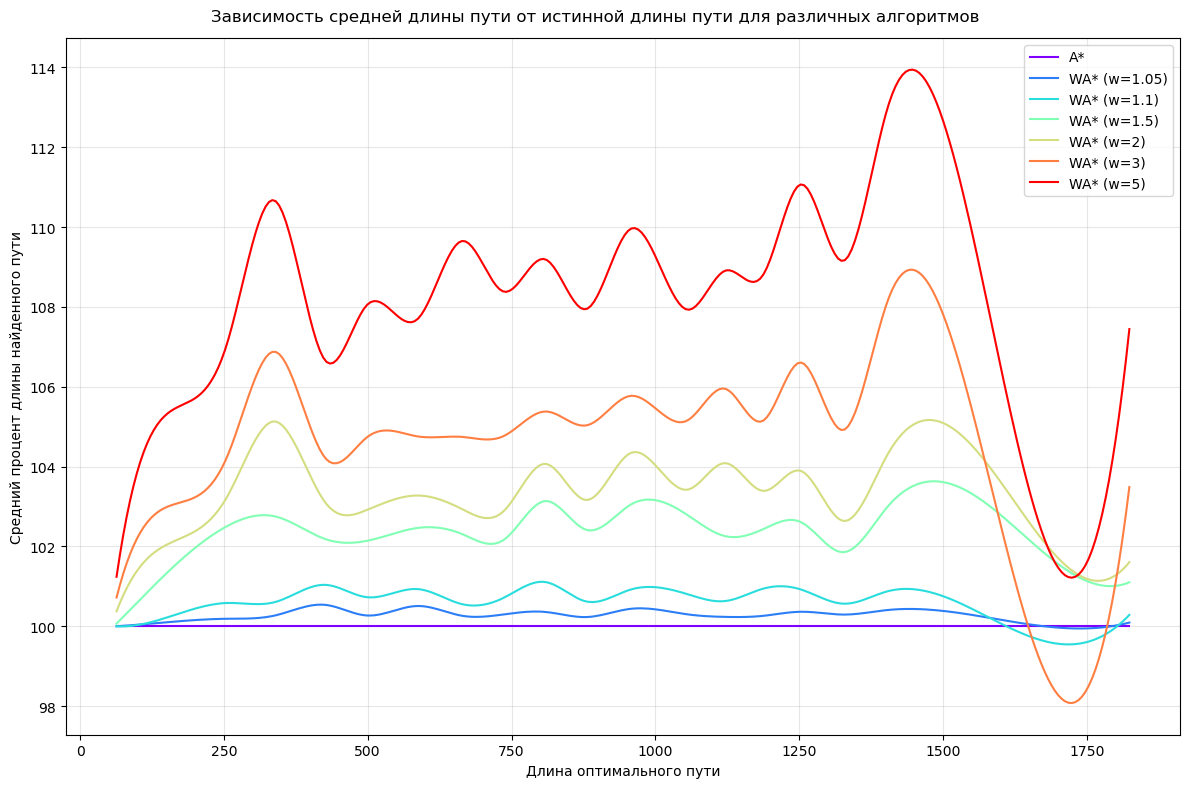

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def split_and_average(data, n_parts=20):
    data_sorted = data.sort_values('true_path_length')
    
    part_size = len(data) // n_parts
    
    averaged_data = []
    
    for i in range(n_parts):
        start_idx = i * part_size
        end_idx = (i + 1) * part_size if i < n_parts - 1 else len(data)
        
        part_data = data_sorted.iloc[start_idx:end_idx]
        
        avg_length = part_data['true_path_length'].mean()
        avg_ratio = part_data['path_length_ratio'].mean()
        
        averaged_data.append({'true_path_length': avg_length, 'path_length_ratio': avg_ratio})
    
    return pd.DataFrame(averaged_data)

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Зависимость средней длины пути от истинной длины пути для различных алгоритмов')

colors = plt.cm.rainbow(np.linspace(0, 1, 7))

ax.set_xlabel('Длина оптимального пути')
ax.set_ylabel('Средний процент длины найденного пути')

astar_data = test_results[test_results['search_function'] == 'astar']
astar_avg = split_and_average(astar_data)

x_new = np.linspace(astar_avg['true_path_length'].min(), astar_avg['true_path_length'].max(), 300)
spline = make_interp_spline(astar_avg['true_path_length'], astar_avg['path_length_ratio'], k=3)
y_smooth = spline(x_new)

ax.plot(x_new, y_smooth, label='A*', color=colors[0])

for j, w in enumerate([1.05, 1.1, 1.5, 2, 3, 5]):
    wastar_data = test_results[(test_results['search_function'] == 'wastar') & 
                               (test_results['w'] == w)]
    if not wastar_data.empty:
        wastar_avg = split_and_average(wastar_data)

        x_new_wastar = np.linspace(wastar_avg['true_path_length'].min(), wastar_avg['true_path_length'].max(), 300)
        spline_wastar = make_interp_spline(wastar_avg['true_path_length'], wastar_avg['path_length_ratio'], k=3)
        y_smooth_wastar = spline_wastar(x_new_wastar)

        ax.plot(x_new_wastar, y_smooth_wastar, label=f'WA* (w={w})', color=colors[j+1])

ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_png/path_length_combined.png')
plt.show()

### График 4

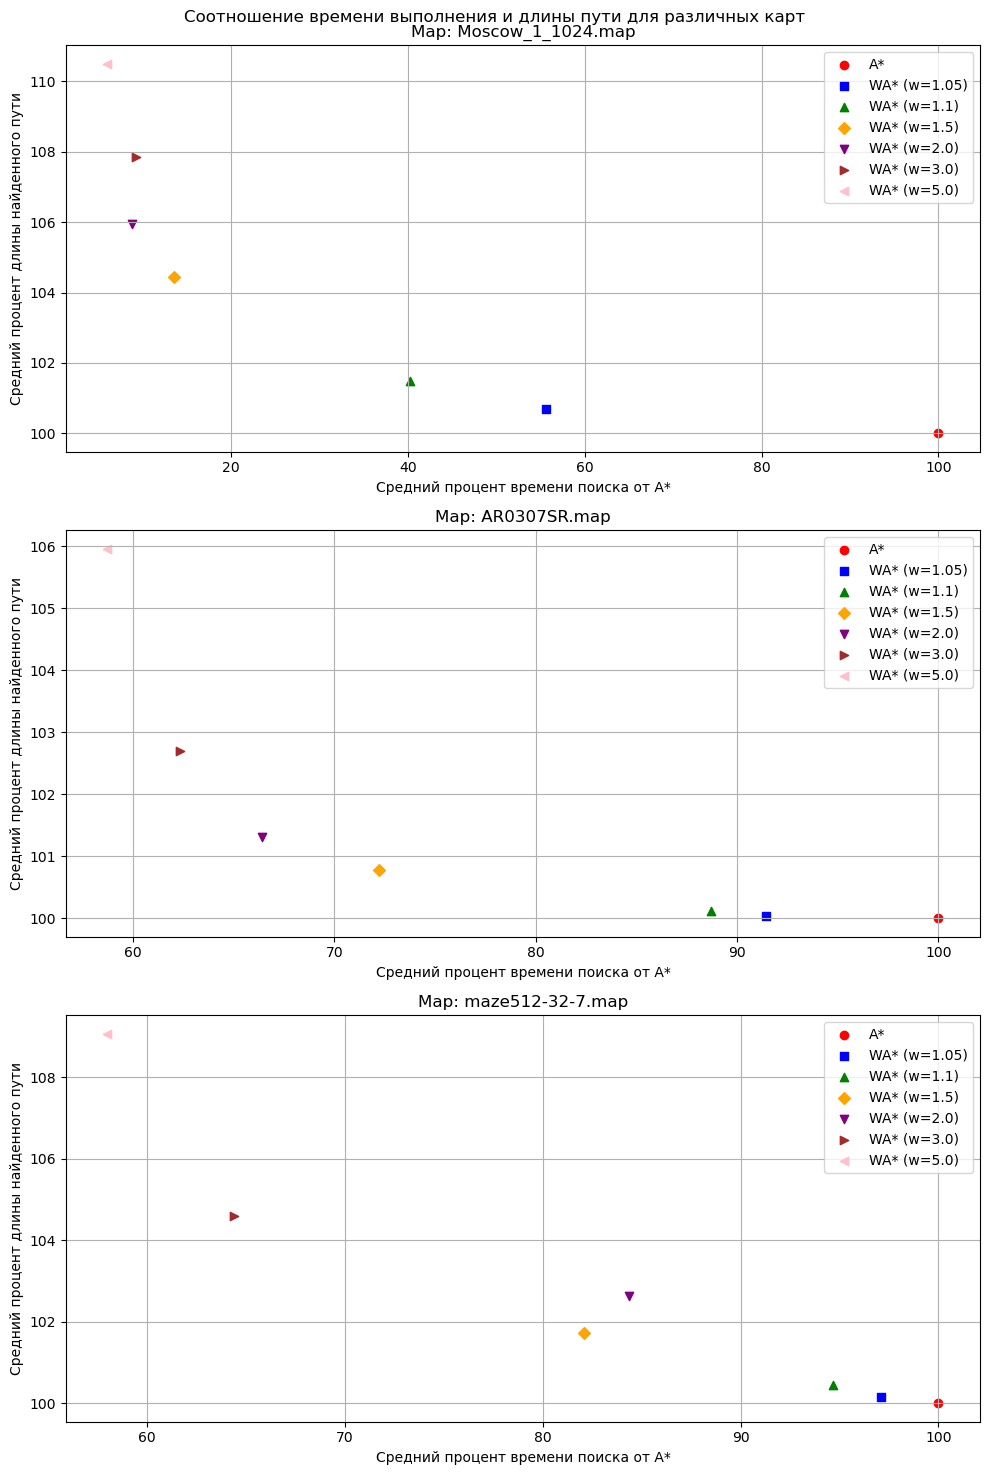

In [77]:
import matplotlib.pyplot as plt

grouped_data = test_results.groupby(['map', 'search_function', 'w']).agg({
    'runtime_ratio': 'mean',
    'path_length_ratio': 'mean'
}).reset_index()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Соотношение времени выполнения и длины пути для различных карт')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
markers = ['o', 's', '^', 'D', 'v', '>', '<']

for i, map_type in enumerate(['Moscow_1_1024.map', 'AR0307SR.map', 'maze512-32-7.map']):
    map_data = grouped_data[grouped_data['map'] == map_type]
    
    astar_data = map_data[map_data['search_function'] == 'astar']
    axs[i].scatter(astar_data['runtime_ratio'], astar_data['path_length_ratio'], 
                   color=colors[0], marker=markers[0], label='A*')
    
    wastar_data = map_data[map_data['search_function'] == 'wastar']
    for j, (w, group) in enumerate(wastar_data.groupby('w')):
        axs[i].scatter(group['runtime_ratio'], group['path_length_ratio'], 
                       color=colors[j+1], marker=markers[j+1], label=f'WA* (w={w})')
    
    axs[i].set_xlabel('Средний процент времени поиска от A*')
    axs[i].set_ylabel('Средний процент длины найденного пути')
    axs[i].set_title(f'Map: {map_type}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.savefig('plots_png/runtime_path_points.png')
plt.show()

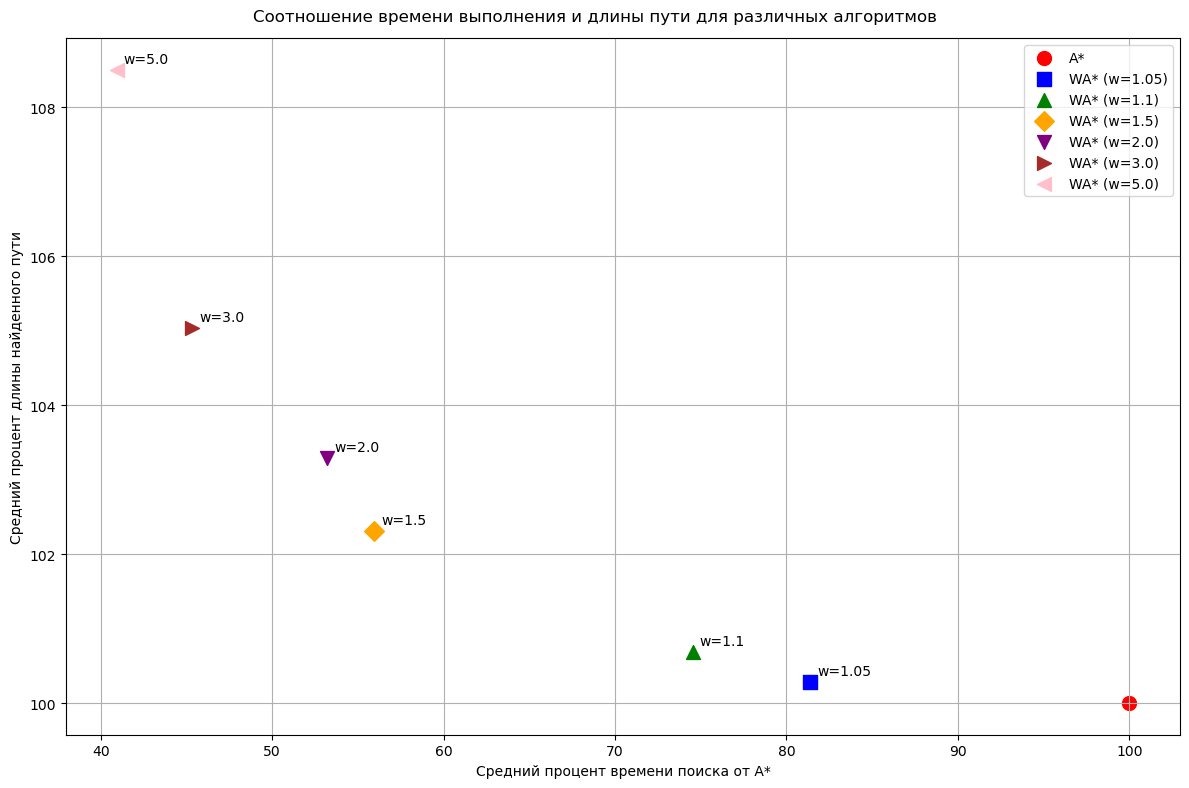

In [78]:
import matplotlib.pyplot as plt

grouped_data = test_results.groupby(['search_function', 'w']).agg({
    'runtime_ratio': 'mean',
    'path_length_ratio': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Соотношение времени выполнения и длины пути для различных алгоритмов')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
markers = ['o', 's', '^', 'D', 'v', '>', '<']

astar_data = grouped_data[grouped_data['search_function'] == 'astar']
ax.scatter(astar_data['runtime_ratio'], astar_data['path_length_ratio'], 
           color=colors[0], marker=markers[0], label='A*', s=100)

wastar_data = grouped_data[grouped_data['search_function'] == 'wastar']
for j, (w, group) in enumerate(wastar_data.groupby('w')):
    ax.scatter(group['runtime_ratio'], group['path_length_ratio'], 
               color=colors[j+1], marker=markers[j+1], label=f'WA* (w={w})', s=100)

ax.set_xlabel('Средний процент времени поиска от A*')
ax.set_ylabel('Средний процент длины найденного пути')
ax.legend()
ax.grid(True)

for _, row in wastar_data.iterrows():
    ax.annotate(f"w={row['w']}", (row['runtime_ratio'], row['path_length_ratio']),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('plots_png/runtime_path_points_combined.png')
plt.show()

### График 5

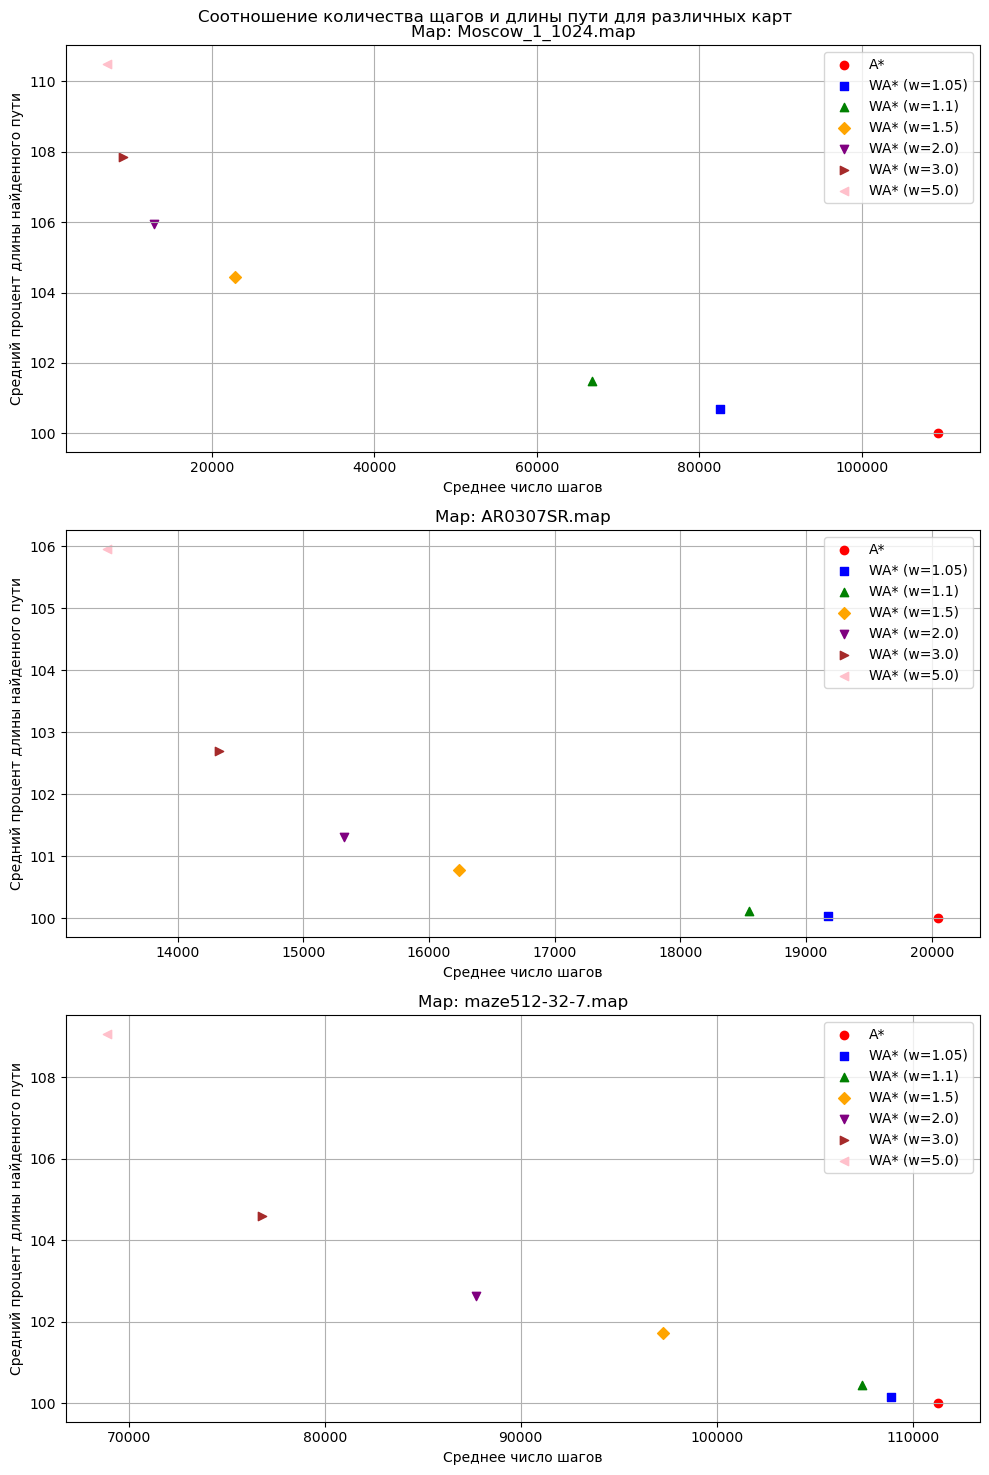

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = test_results.groupby(['map', 'search_function', 'w']).agg({
    'steps': 'mean',
    'path_length_ratio': 'mean'
}).reset_index()

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Соотношение количества щагов и длины пути для различных карт')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
markers = ['o', 's', '^', 'D', 'v', '>', '<']

for i, map_type in enumerate(['Moscow_1_1024.map', 'AR0307SR.map', 'maze512-32-7.map']):
    map_data = grouped_data[grouped_data['map'] == map_type]
    
    astar_data = map_data[map_data['search_function'] == 'astar']
    axs[i].scatter(astar_data['steps'], astar_data['path_length_ratio'], 
                   color=colors[0], marker=markers[0], label='A*')
    
    wastar_data = map_data[map_data['search_function'] == 'wastar']
    for j, (w, group) in enumerate(wastar_data.groupby('w')):
        axs[i].scatter(group['steps'], group['path_length_ratio'], 
                       color=colors[j+1], marker=markers[j+1], label=f'WA* (w={w})')
    
    axs[i].set_xlabel('Среднее число шагов')
    axs[i].set_ylabel('Средний процент длины найденного пути')
    axs[i].set_title(f'Map: {map_type}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.savefig('plots_png/steps_path_points.png')
plt.show()

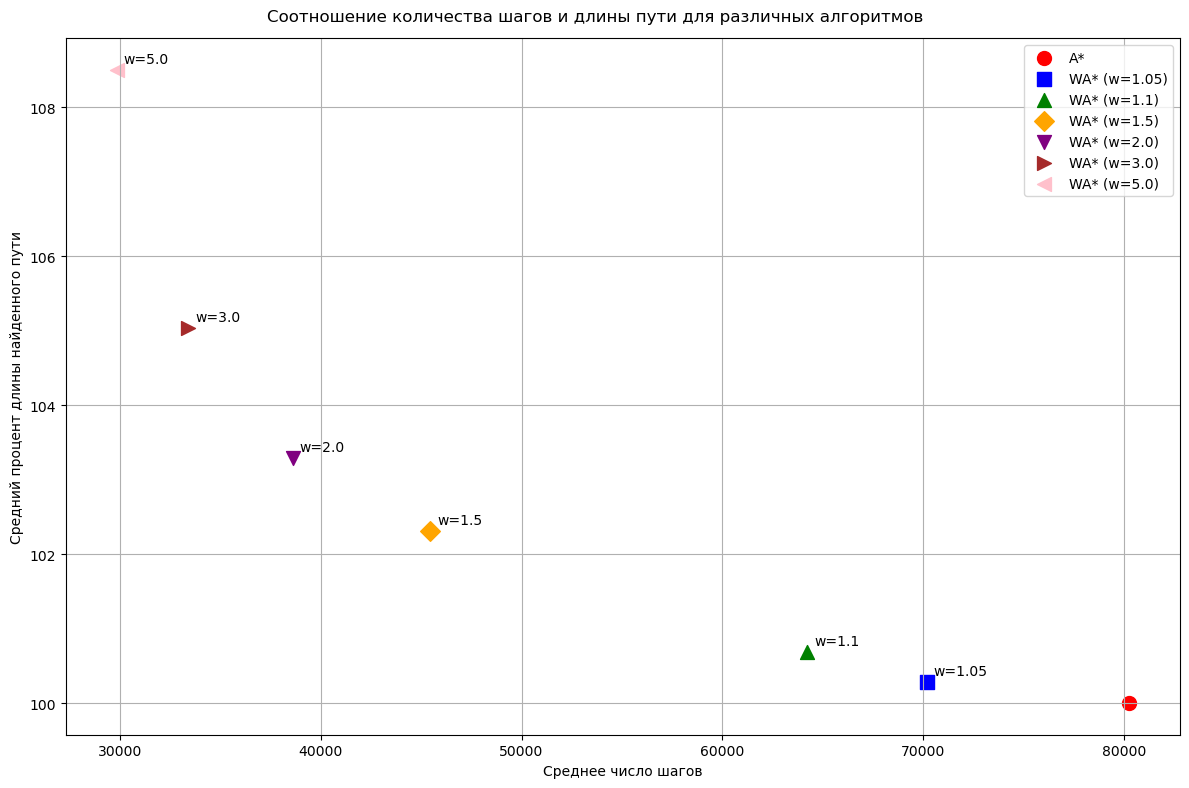

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = test_results.groupby(['search_function', 'w']).agg({
    'steps': 'mean',
    'path_length_ratio': 'mean'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Соотношение количества шагов и длины пути для различных алгоритмов')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
markers = ['o', 's', '^', 'D', 'v', '>', '<']

astar_data = grouped_data[grouped_data['search_function'] == 'astar']
ax.scatter(astar_data['steps'], astar_data['path_length_ratio'], 
           color=colors[0], marker=markers[0], label='A*', s=100)

wastar_data = grouped_data[grouped_data['search_function'] == 'wastar']
for j, (w, group) in enumerate(wastar_data.groupby('w')):
    ax.scatter(group['steps'], group['path_length_ratio'], 
               color=colors[j+1], marker=markers[j+1], label=f'WA* (w={w})', s=100)

ax.set_xlabel('Среднее число шагов')
ax.set_ylabel('Средний процент длины найденного пути')
ax.legend()
ax.grid(True)

for _, row in wastar_data.iterrows():
    ax.annotate(f"w={row['w']}", (row['steps'], row['path_length_ratio']),
                xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig('plots_png/steps_path_points_combined.png')
plt.show()